# Posthoc Analysis of IMAGEN:
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>
<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

1. Summary statistics
2. Sensitivity analysis
3. Error analysis
4. Visualization SHAP

In [1]:
#################################################################################
""" IMAGEN Extend Analysis """
# Author: JiHoon Kim, <jihoon.kim@fu-berlin.de>, 23th September 2021
from imagen_instrumentloader import *
from imagen_plot_statistics import *

<b> Load the dataset </b>

In [2]:
# RUN
RUN = pd.read_csv('newlbls-fu3-espad-fu3-19a-binge-n650_val_run.csv')
# Psychological profile
NEO = IMAGEN_instrument()
b_NEO = NEO.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_NEO.csv')
SURPS = IMAGEN_instrument()
b_SURPS = SURPS.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_SURPS.csv')
# Social profile
CTQ = IMAGEN_instrument()
b_CTQ = CTQ.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_CTQ.csv')
LEQ = IMAGEN_instrument()
b_LEQ = LEQ.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_LEQ.csv')
CTS = IMAGEN_instrument()
b_CTS = CTS.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_CTS.csv')

<b> Generate the posthoc dataset </b>

In [3]:
ph_NEO = pd.merge(b_NEO, RUN, on=['ID','Sex','Site','Class'], how = 'outer')
ph_SURPS = pd.merge(b_SURPS, RUN, on=['ID','Sex','Site','Class'], how = 'outer')
ph_CTQ = pd.merge(b_CTQ, RUN, on=['ID','Sex','Site','Class'], how = 'outer')
ph_LEQ = pd.merge(b_LEQ, RUN, on=['ID','Sex','Site','Class'], how = 'outer')
ph_CTS = pd.merge(b_CTS, RUN, on=['ID','Sex','Site','Class'], how = 'outer')

# 1. Summary Statistics
## 1.1. Psychological profile
See the list of Summary Statistics on Psychological profile:
<br>
Do the posthoc analysis on the following questionnaires and generate the summary statistics:
1. <b>NEO-PI-R</b>: NEO Personality Inventory based on Five-Factor Model of personality (Costa & McCrae, 1992)
2. <b>SURPS</b>: Substance Use Risk Profile Scale (Conrod & Woicik, 2002, Woicik et al., 2009)

### 1.1.1. NEO-PI-R ###
The NEO-PI-R is a valid method of assessing broad dimensions of personality (De Fruyt, et al. 2000) based on the Five-Factor Model of personality (Costa and McCrea, 1997).<br>
- <b>Neuroticism mean</b>: mean of tendency toward unstable emotions
- <b>Extroversion mean</b>: mean of sociability, assertiveness, emotional expression
- <b>Openness mean</b>: mean of imagination, feelings, actions, ideas
- <b>Agreeableness mean</b>: mean of cooperative, trustworthy, good-natured
- <b>Conscientiousness mean</b>: mean of competence, self-discipline, thoughtfulness, goal-driven

#### Diagnosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> Select the session (FU3)) </b>

In [4]:
ses_data = b_NEO
# groupby Session, code refactoring needed
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
roi = b_FU3.columns[:5]
b_NEO = b_FU3
c_NEO = [roi[2], roi[4], roi[1], roi[3], roi[0]]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=3.768e-03 stat=-2.907e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.844e-05 stat=4.216e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.385e-07 stat=-5.326e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with 

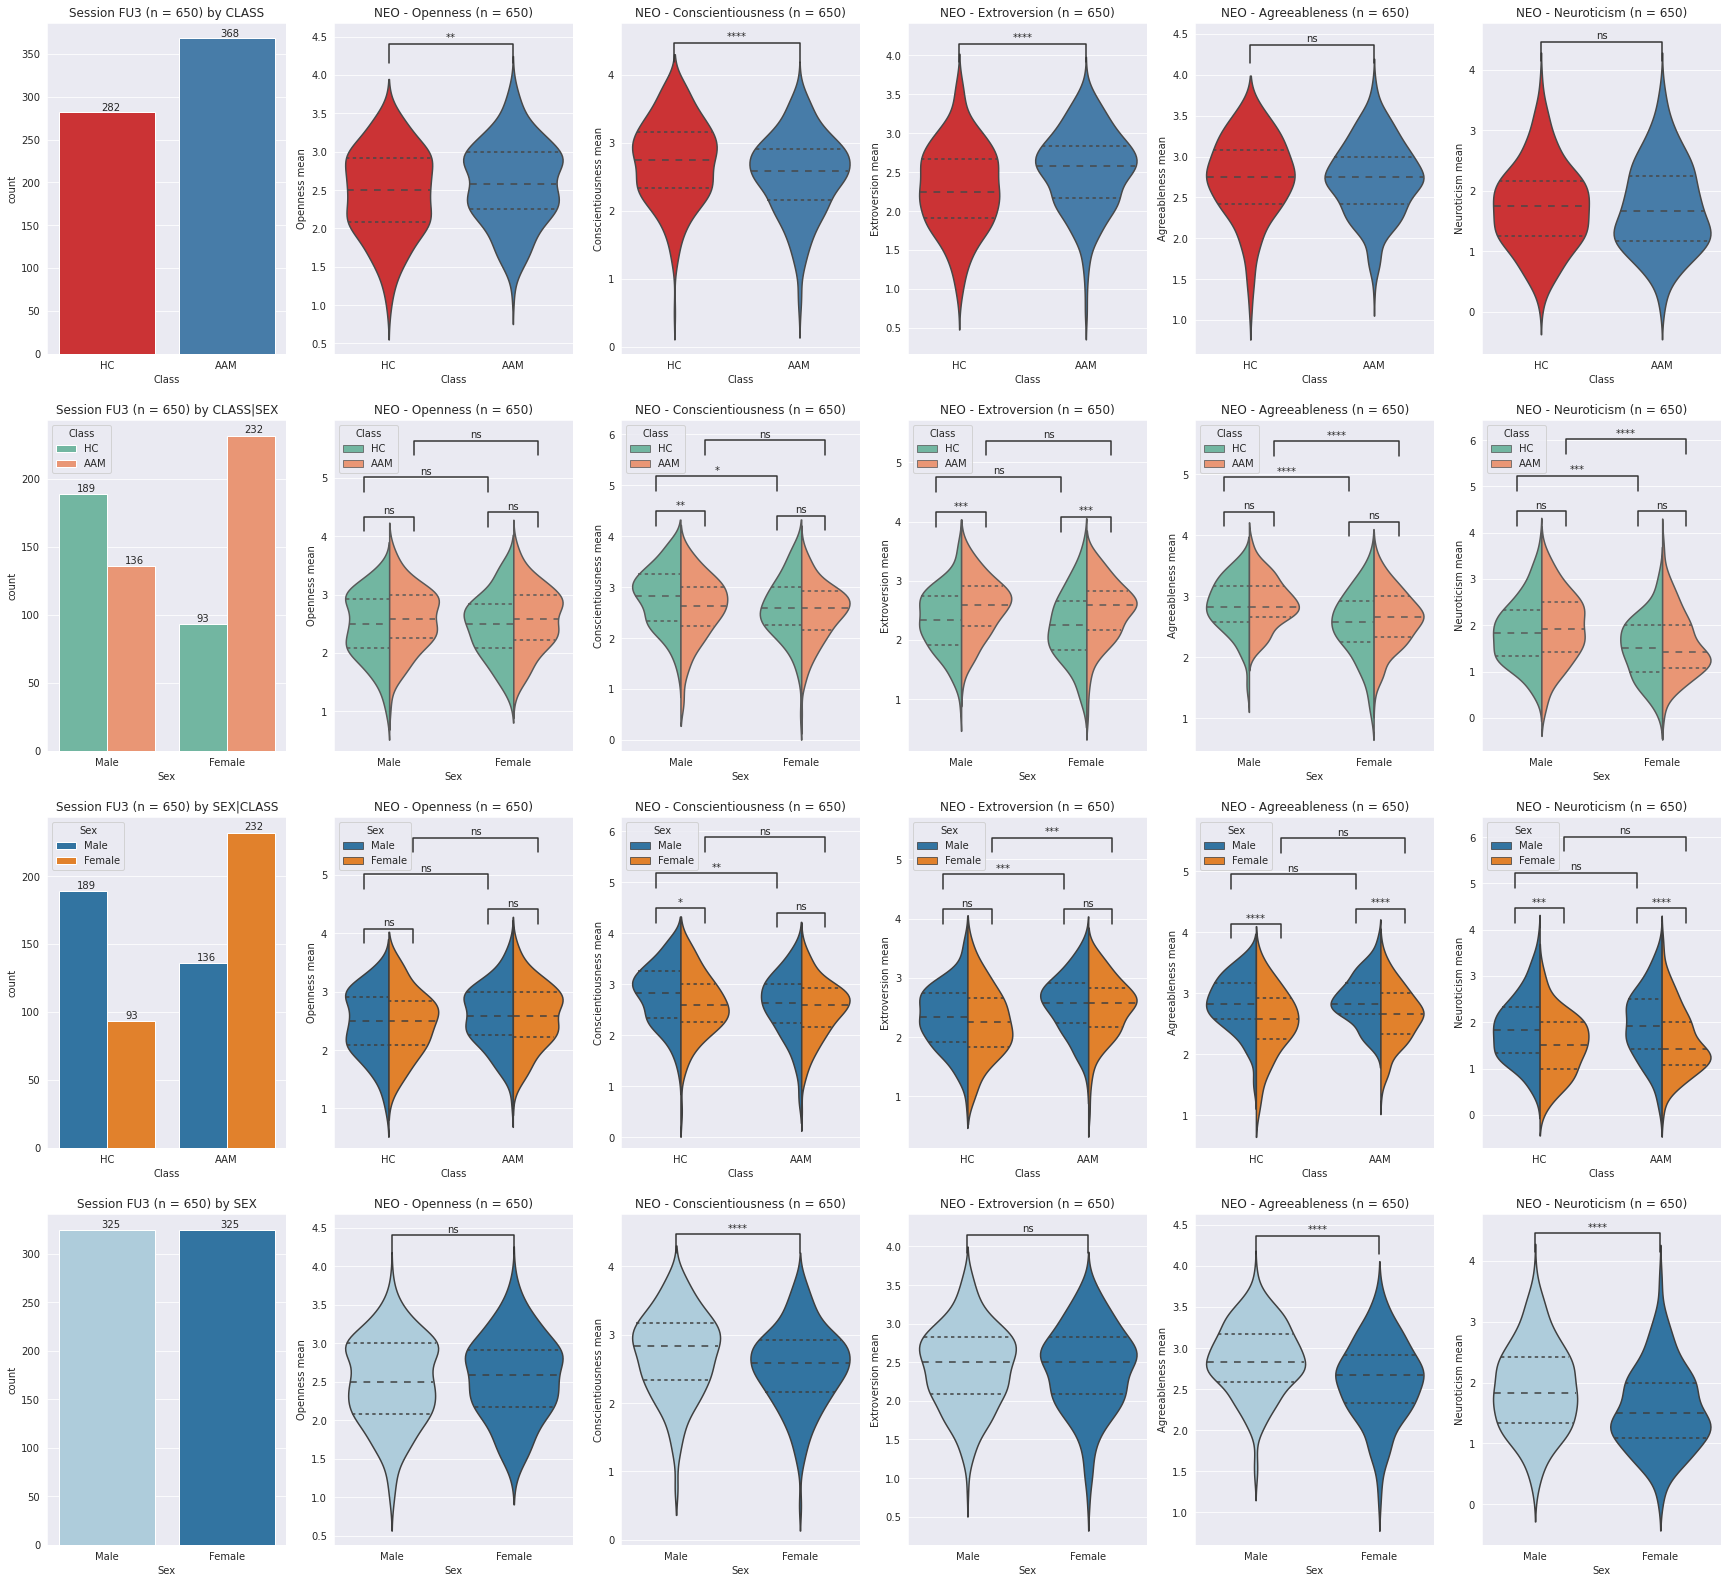

In [5]:
data = b_NEO
col = c_NEO

NEO_result = sc_plot('NEO', data, col)

#### Prognosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> (To do) </b>

### 1.1.2. SURPS ###
Assesses lower order personality traits related to psychopathology (e.g., anxiety sensitivity, thrill seeking, pessimism and impulsivity). The Substance Use Risk Profile Scale (SURPS; Conrod & Woicik, 2002) assesses levels of several personality risk factors for substance abuse/dependence and psychopathology.
- <b>Hopelessness mean</b>: mean of hopelessness
- <b>Anxiety sensitivity mean</b>: mean of anxiety sensitivity
- <b>Impulsivity mean</b>: mean of impulsivity
- <b>Sensation seeking mean</b>: mean of sensation seeking

#### Diagnosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> Select the session (FU3)) </b>

In [6]:
ses_data = b_SURPS
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
roi = b_FU3.columns[:4]

b_SURPS = b_FU3
c_SURPS = [roi[1],roi[0],roi[2],roi[3]]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=9.627e-01 stat=-4.682e-02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=5.190e-01 stat=-6.452e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.643e-03 stat=-3.162e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

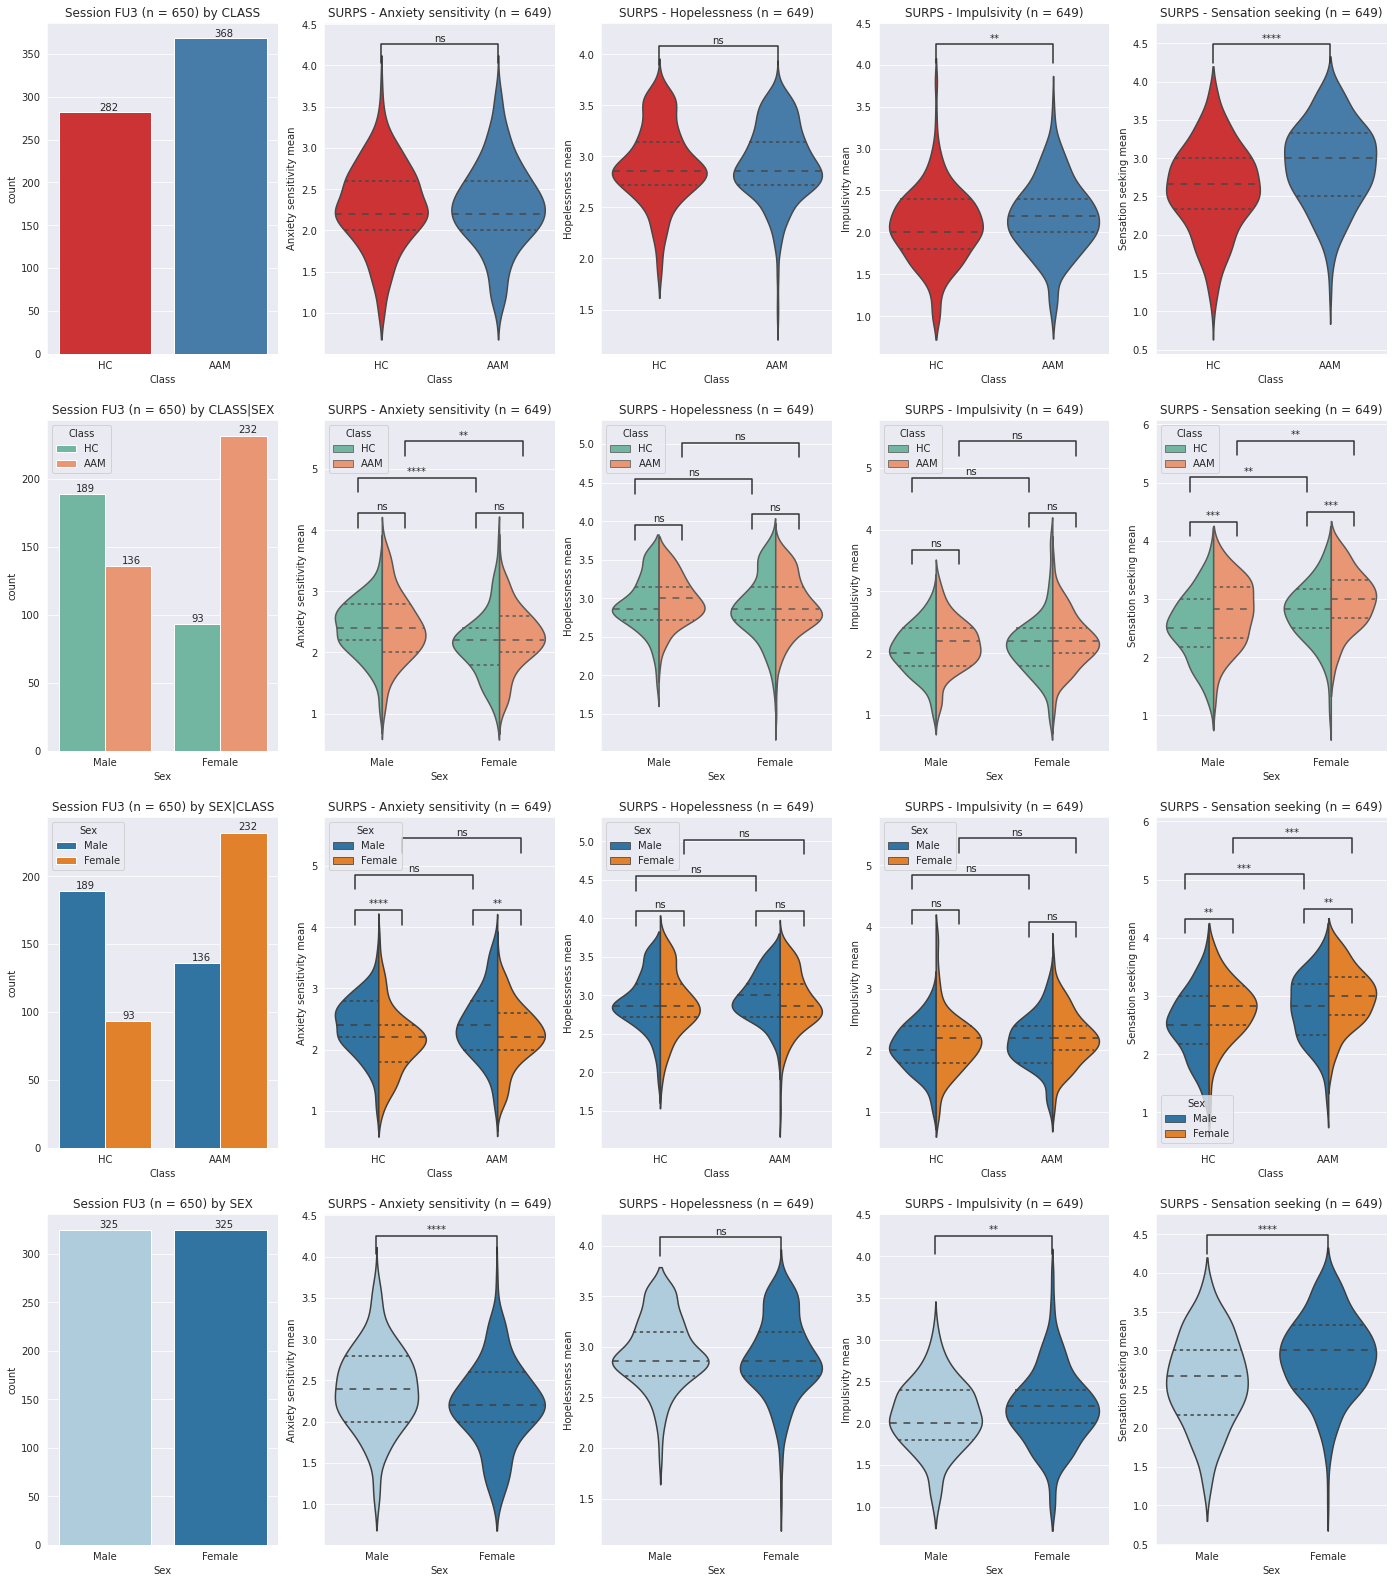

In [7]:
# Plot the result by Sex & Class
data = b_SURPS
col = c_SURPS
SURPS_result = sc_plot('SURPS', data, col)

#### Prognosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> (To do) </b>

## 1.2. Socio-economic profile
See the list of Summary Statistics on Socio-economic profile:
Do the posthoc analysis on the following questionnaires and generate the summary statistics:
<br>
1. <b>CTQ-SF</b>: The Childhood Trauma Questionnaire (Bernstein & Fink, 1997)
2. <b>LEQ</b>: Life-Events Questionnaire (adapted from Newcomb et al., 1981)
3. <b>CTS</b>: Conflict Tactics Scale (Bernstein & Fink, 1997)

### 1.2.1. CTQ_SF
The Childhood Trauma Questionnaire (CTQ, Bernstein & Fink, 1997) is a 28-item self-report inventory that provides brief, reliable, and valid screening for histories of abuse and neglect. It inquires about five types of maltreatment - emotional, physical, and sexual abuse, and emotional and physical neglect. Also included is a 3 item Minimization /Denial scale for detecting false-negative trauma reports. The CTQ has been widely and successfully employed in several studies including gene-neuroimaging studies (Caspi et al., 2010). Suitable for adolescents and adults 12+ years.
<br>
- <b>Emotional abuse sum</b> 
- <b>Physical abuse sum</b> 
- <b>Sexual abuse sum</b>
- <b>Emotional neglect sum</b>
- <b>Physical neglect sum</b> 
- <b>Denial sum</b>

#### Diagnosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> Select the session (FU2)) </b>

In [8]:
# Select the session: FU2
roi = b_CTQ.columns[:6]
c_CTQ = [roi[5], roi[0], roi[3], roi[1], roi[4], roi[2]]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.223e-03 stat=3.251e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.750e-01 stat=-1.358e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.321e-01 stat=1.508e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with B

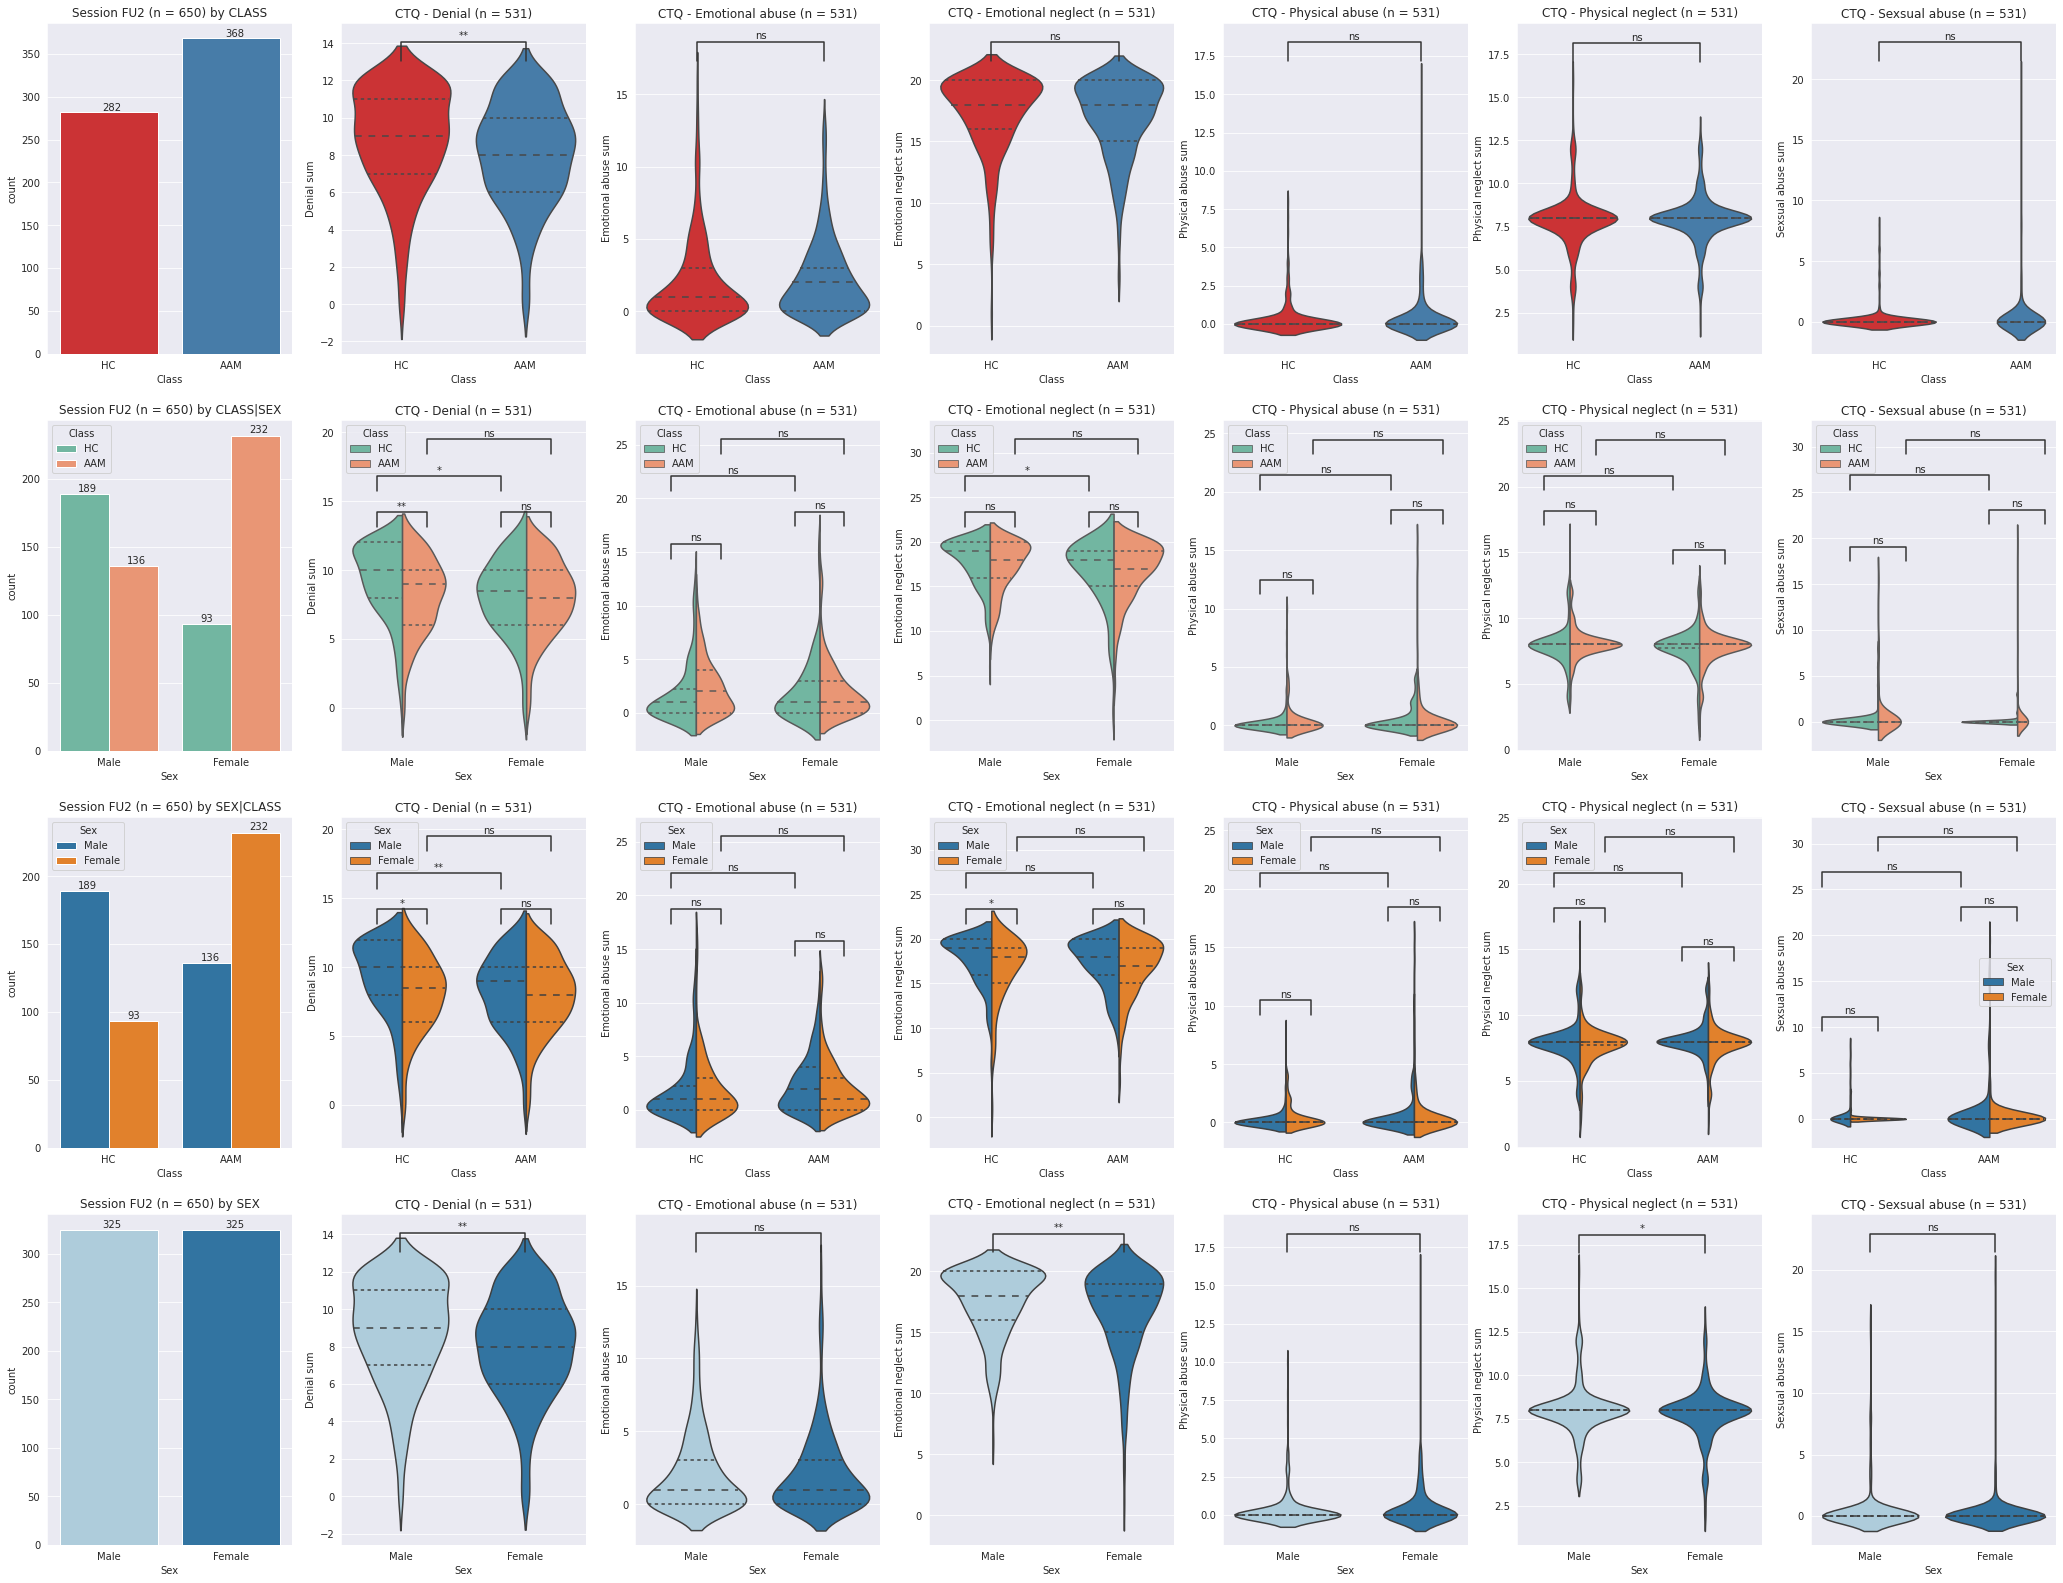

In [9]:
# Plot the result by Sex & Class
data = b_CTQ
col = c_CTQ
CTQ_result = sc_plot('CTQ', data, col)

#### Prognosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> (To do) </b>

### 1.2.2. LEQ

#### Diagnosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
<b> Select the session (FU3)) </b>

In [10]:
# Select the session: FU3
ses_data = b_LEQ
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
c_LEQ = b_LEQ.columns[0:8]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.434e-01 stat=3.275e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.402e-02 stat=2.262e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.784e-02 stat=2.204e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bo

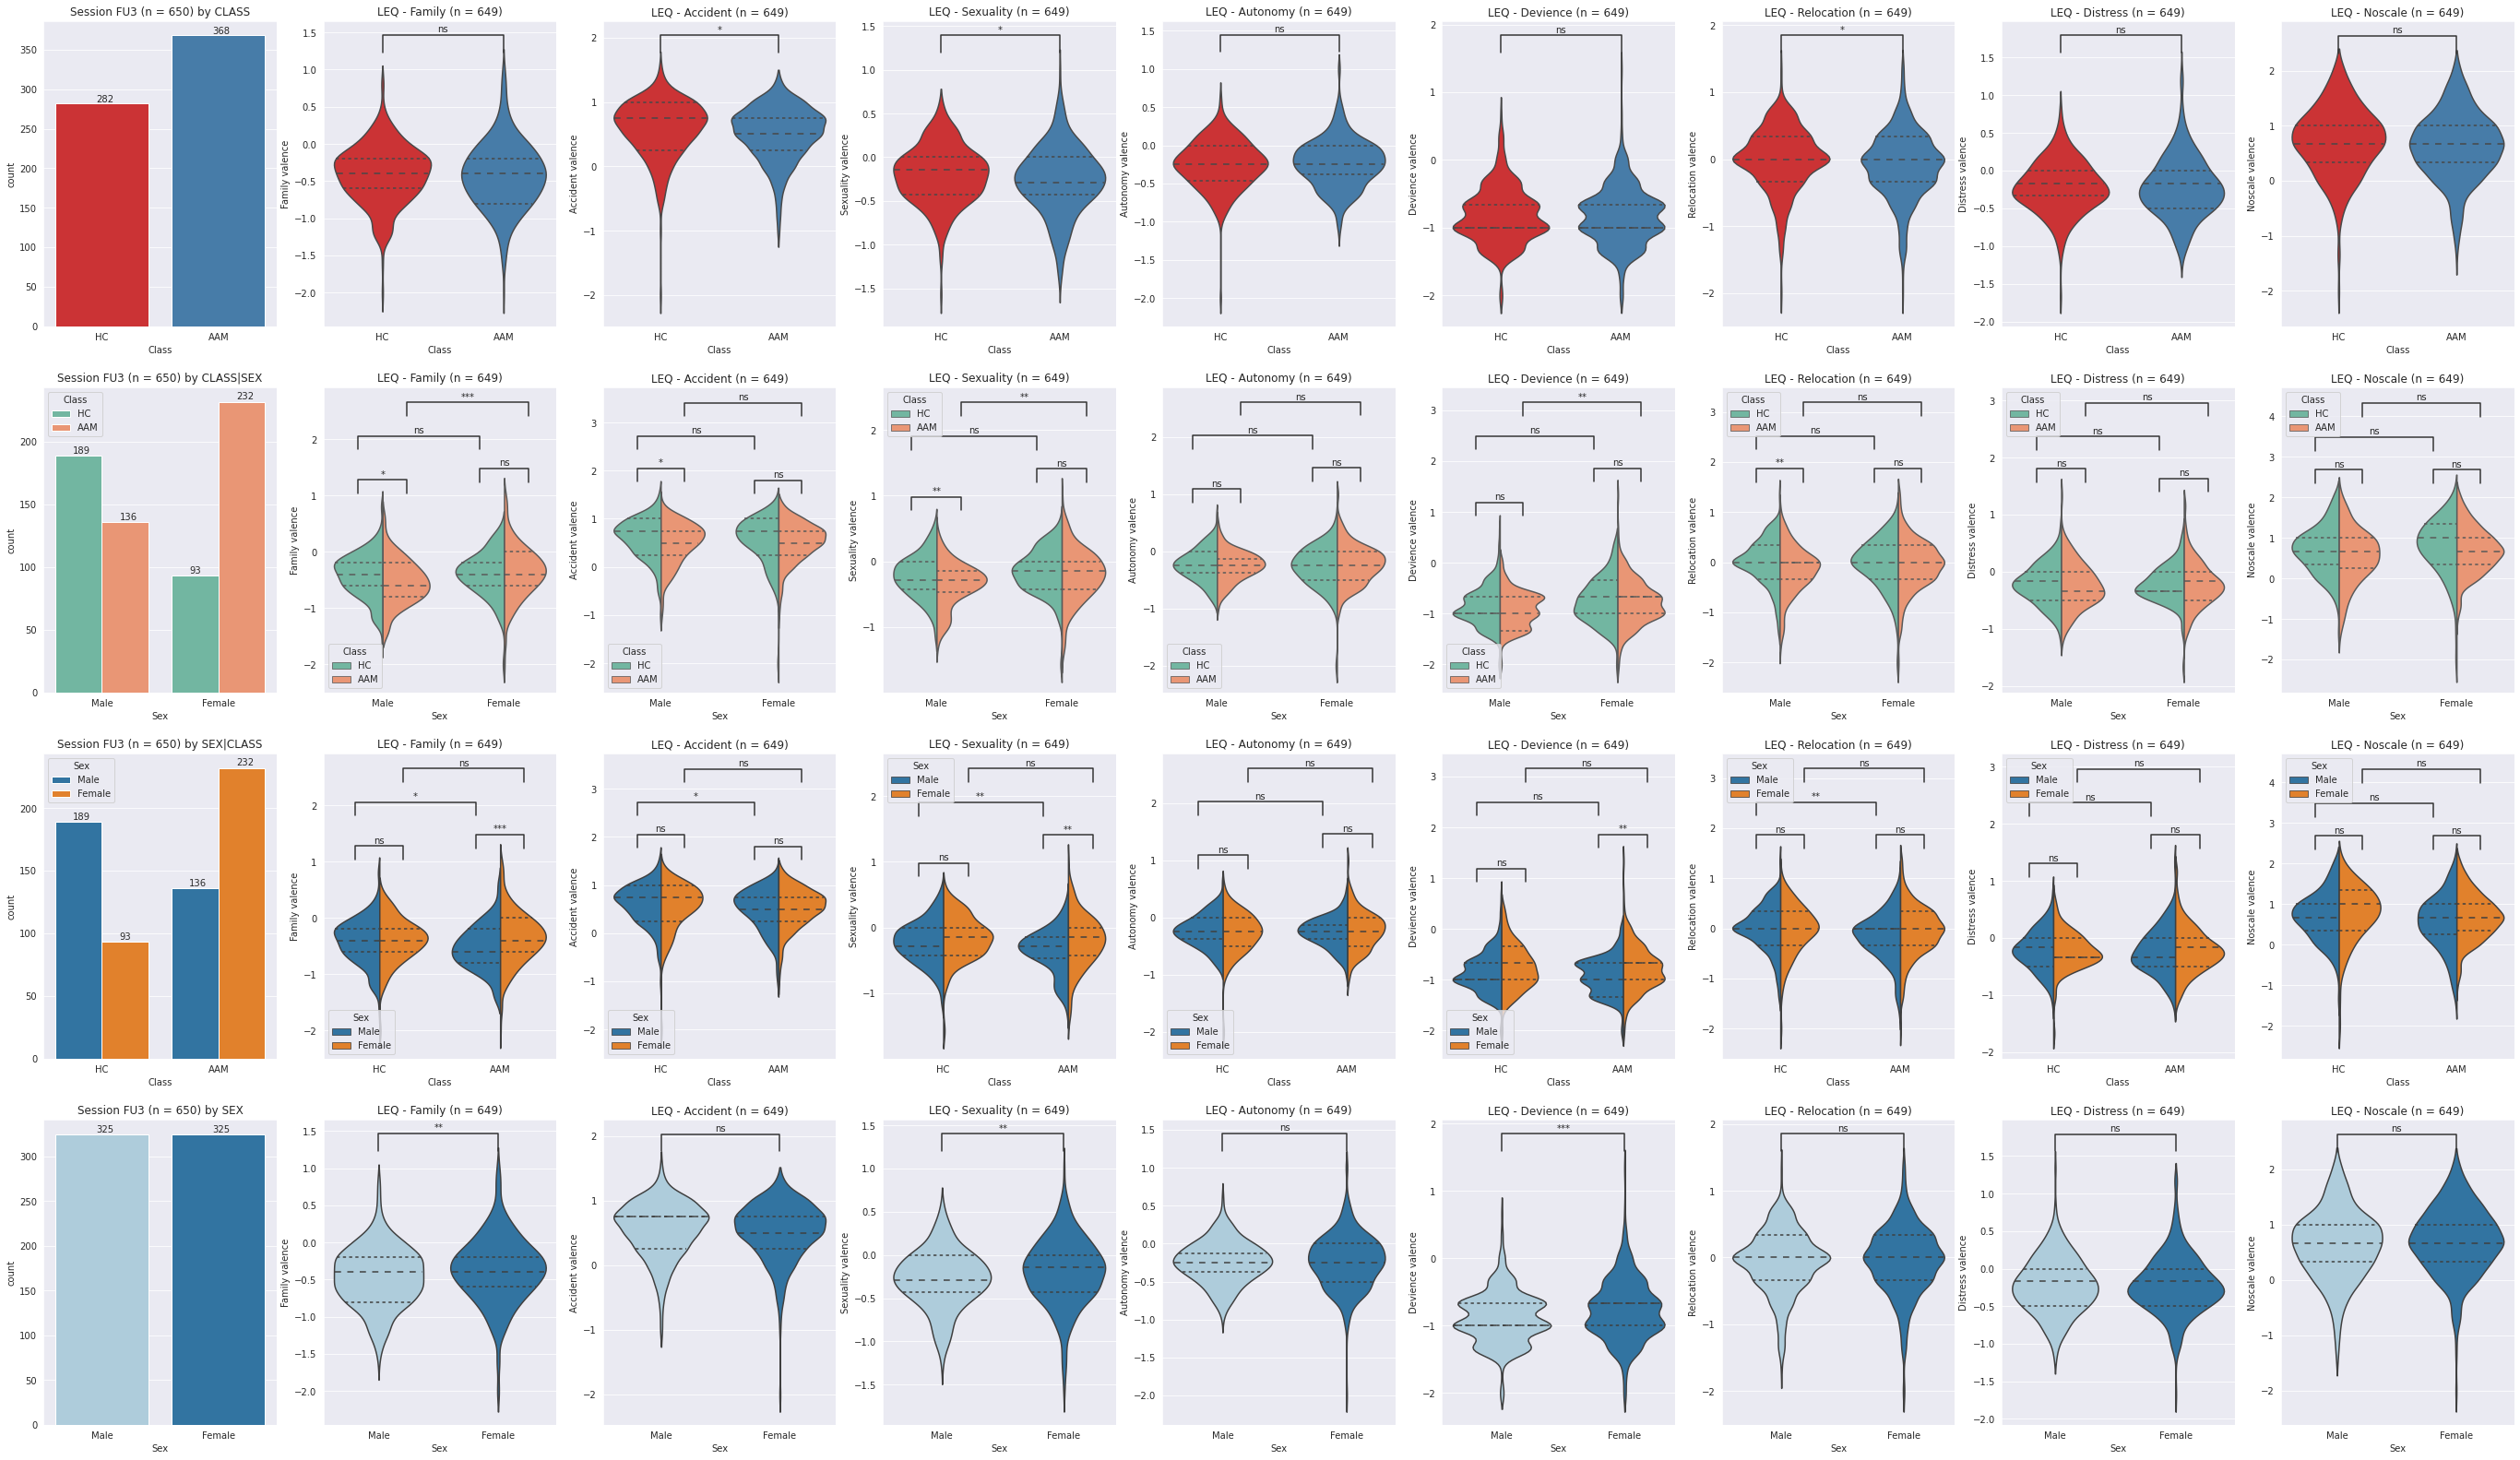

In [11]:
# Plot the result by Sex & Class
data = b_FU3
col = c_LEQ
LEQ_result = sc_plot('LEQ', data, col)

#### Prognosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> (To do) </b>

### 1.2.3. CTS
Conflict Tactics Scale (CTS)
#### Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
<b> Select the session (FU3)) </b>

In [12]:
# Select the session: BL
c_CTS = b_CTS.columns[:5]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=6.123e-01 stat=-5.071e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.025e-01 stat=3.822e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=4.131e-02 stat=-2.045e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with 

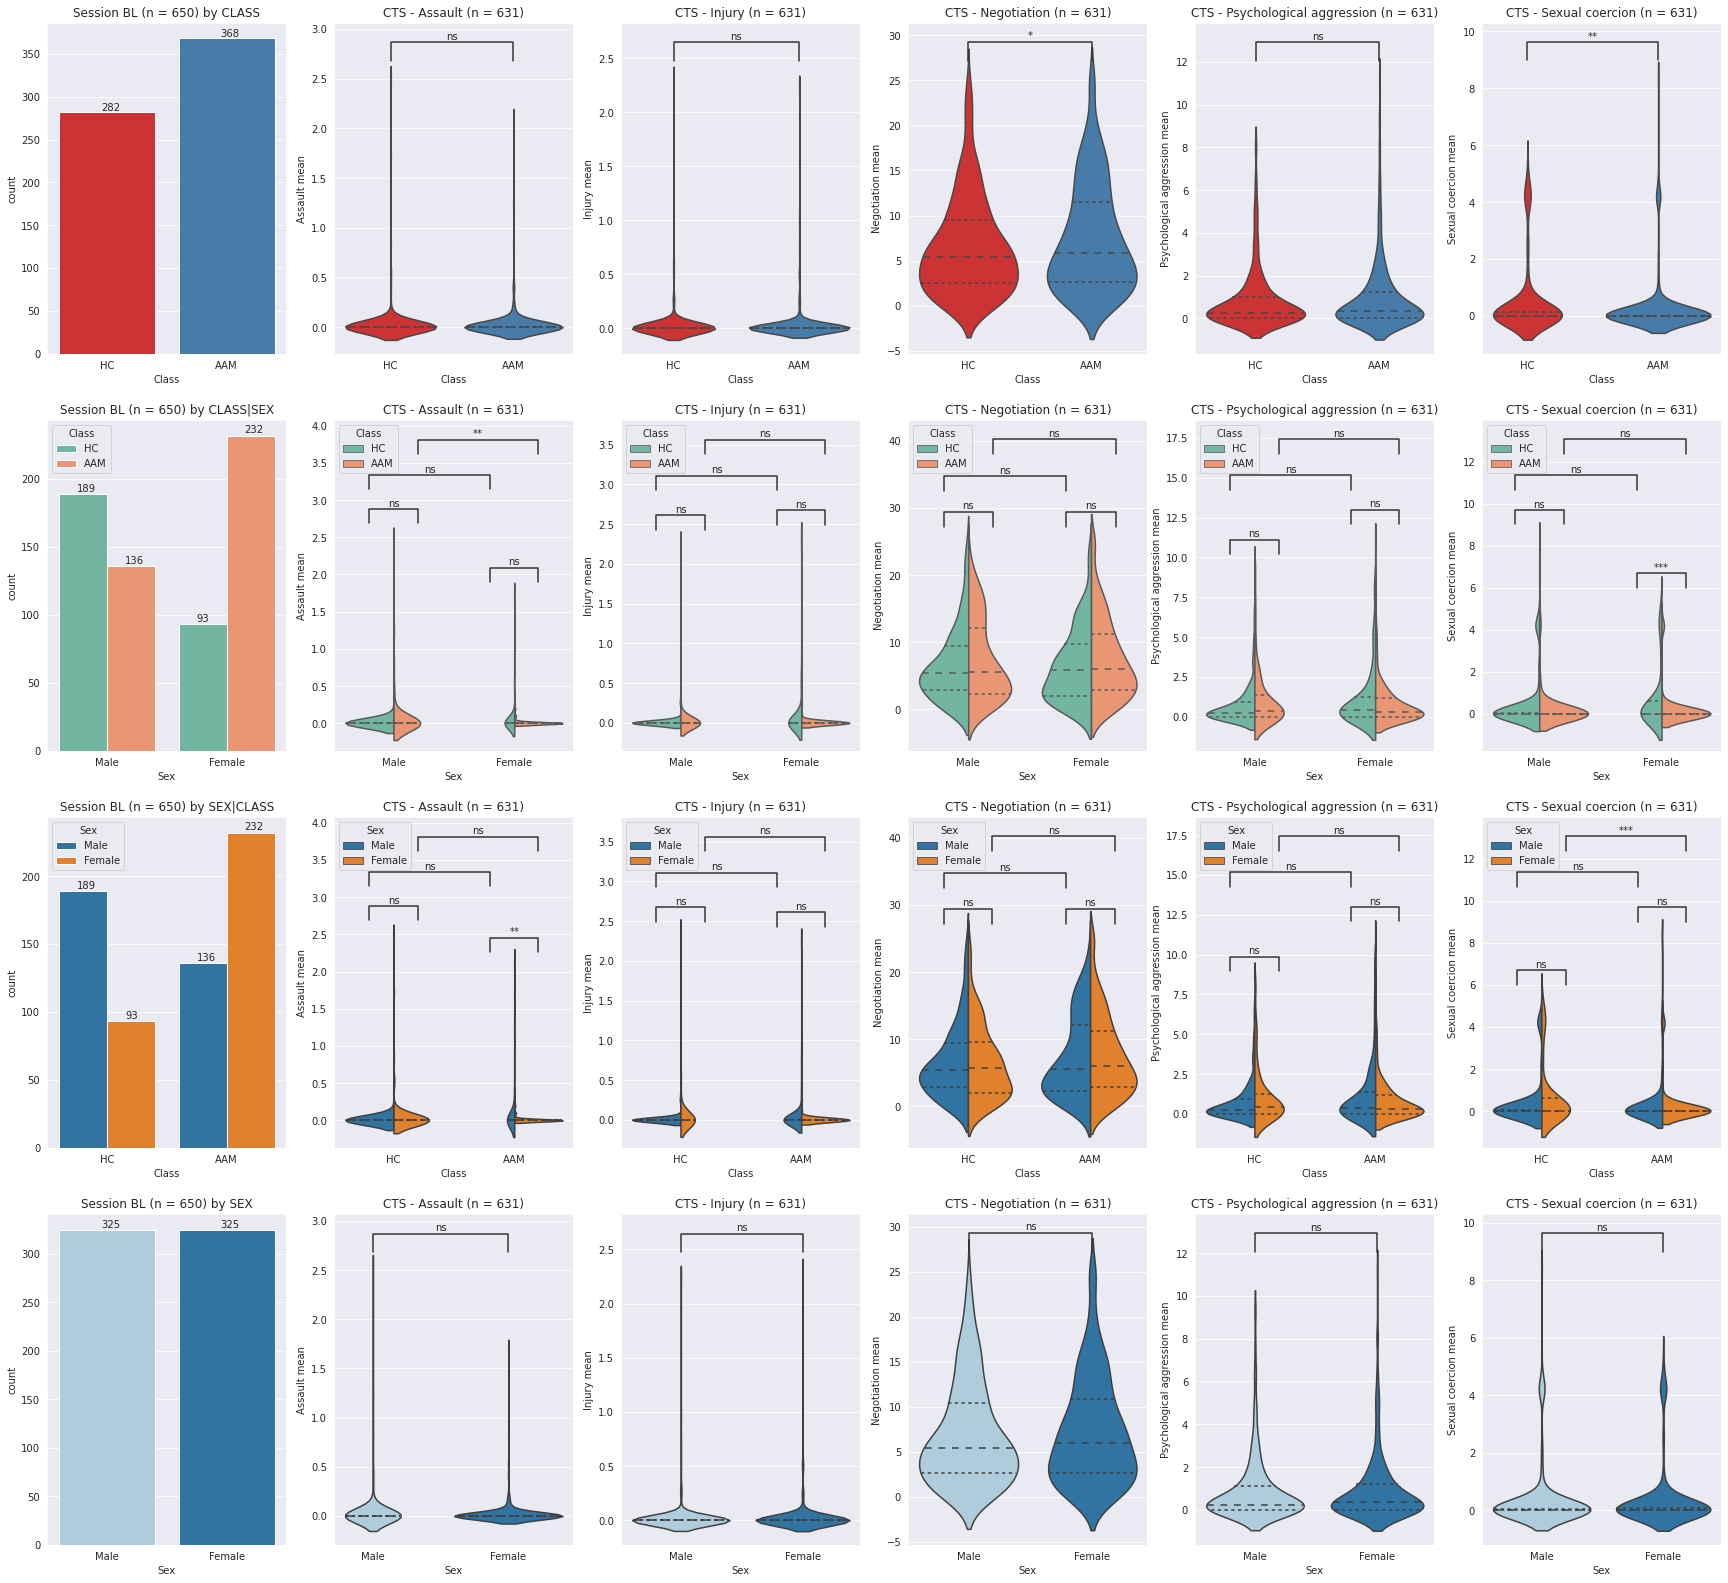

In [13]:
# Plot the result by Sex & Class
data = b_CTS
col = c_CTS
CTS_result = sc_plot('CTS', data, col)

#### Prognosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> (To do) </b>

# 2. Sensitivity Analysis

In [14]:
%load_ext autoreload
%autoreload 2

import pandas as pd 
import numpy as np
from glob import glob
from os.path import join 
import os 
from scikits.bootstrap import ci
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from plotResults import *

## 2.1. Visualization
### 2.1.1. probabilitiy distributions

In [15]:
df = pd.read_csv(sorted(glob("results/newlbls-fu3-espad-fu3-19a-binge-*/*/run.csv"))[-1])

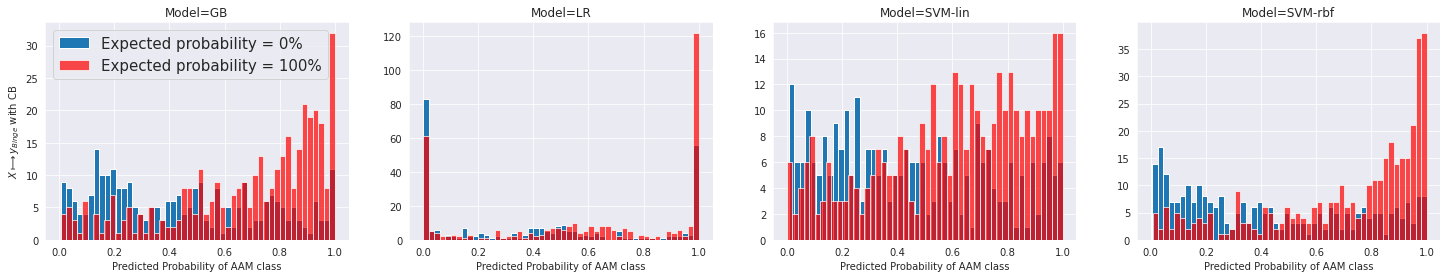

In [16]:
grp_order = ["io", "technique", "model"]
groups = df.groupby(grp_order)   
n_models = len(df["model"].unique())
n_rows = round(len(groups)/n_models)
fig, axes = plt.subplots(n_rows, n_models, 
                         sharex=True, sharey=False,
                         figsize=(25, n_models*n_rows))
axes = np.ravel(axes)
        
for i, (g, dfi) in enumerate(groups):
    ids_all = np.array([id_lists for ids in dfi["test_ids"] for id_lists in eval(ids)])
    assert ids_all.shape[0] == np.unique(ids_all).shape[0]
    probs_all = np.array([prob_lists for probs in dfi["test_probs"] for prob_lists in eval(probs)])
    y_all = np.array([y_lists for y in dfi["test_lbls"] for y_lists in eval(y)])
    assert probs_all.shape[0] == y_all.shape[0]

    prediction=probs_all[:,1]
    ax = axes[i]
    ax.hist(prediction[y_all==0], bins=50, label='Expected probability = 0%')
    ax.hist(prediction[y_all==1], bins=50, label='Expected probability = 100%', alpha=0.7, color='r')
    ax.set_xlabel('Predicted Probability of AAM class')
    if i%n_models == 0:
        ax.set_ylabel("{} with {}".format(remap_io(dfi.iloc[0]), g[1].upper()))
    if i == 0:
        ax.legend(fontsize=15)
    ax.set_title("Model={}".format(g[-1]))
    
plt.show()

## 2.2 Performance across sites
### 2.2.1. main experiment

In [17]:
DF = pd.read_csv('newlbls-fu3-espad-fu3-19a-binge-n650_run.csv')

In [18]:
TP = (DF.Labels == 1.0) & (DF.Probability >= 0.5)
TN = (DF.Labels == 0.0) & (DF.Probability <= 0.5)
FP = (DF.Labels == 0.0) & (DF.Probability >= 0.5)
FN = (DF.Labels == 1.0) & (DF.Probability <= 0.5)

DF['TP'] = DF[TP]['Probability']
DF['TN'] = DF[TN]['Probability']
DF['FP'] = DF[FP]['Probability']
DF['FN'] = DF[FN]['Probability']
DF['T'] = DF[TP | TN]['Probability']
DF['F'] = DF[FP | FN]['Probability']

Prob = DF.groupby(['Site','Model']).count()
Prob['ACC'] = (Prob['T']/(Prob['T']+Prob['F']))*100 # (TP+TN)/(TP+FP+FN+TN)
Prob['Recall'] = Prob['TP']/(Prob['TP']+Prob['FN'])*100 # TP/(TP+FN)
Prob['Precision'] = Prob['TP']/(Prob['TP']+Prob['FP'])*100 # TP/(TP+FP) 
Prob['f1 Score'] = 2*(Prob['Precision']*Prob['Recall'])/(Prob['Precision']+Prob['Recall'])

Prob[Prob.columns[9:]]

ACC     Recall  Precision  \
Site       Model                                                              
Berlin     ('X', 'Binge', 'cb', 'GB')       80.487805  40.000000  28.571429   
           ('X', 'Binge', 'cb', 'LR')       78.048780  50.000000  27.777778   
           ('X', 'Binge', 'cb', 'SVM-lin')  74.390244  60.000000  26.086957   
           ('X', 'Binge', 'cb', 'SVM-rbf')  80.487805  30.000000  25.000000   
Dresden    ('X', 'Binge', 'cb', 'GB')       82.795699  96.103896  85.057471   
           ('X', 'Binge', 'cb', 'LR')       66.666667  75.324675  82.857143   
           ('X', 'Binge', 'cb', 'SVM-lin')  71.276596  80.519481  83.783784   
           ('X', 'Binge', 'cb', 'SVM-rbf')  81.914894  94.871795  85.057471   
Dublin     ('X', 'Binge', 'cb', 'GB')       53.846154  45.454545  55.555556   
           ('X', 'Binge', 'cb', 'LR')       50.769231  51.515152  51.515152   
           ('X', 'Binge', 'cb', 'SVM-lin')  52.307692  45.454545  53.571429   
           ('X', 'Binge', 'cb', 'SVM-rbf')  60.606061  48.484848  64.000000   
Hamburg    ('X', 'Binge', 'cb', 'GB')       67.901235  85.483871  75.714286   
           ('X', 'Binge', 'cb', 'LR')       56.790123  61.290323  77.551020   
           ('X', 'Binge', 'cb', 'SVM-lin')  64.197531  67.741935  82.352941   
           ('X', 'Binge', 'cb', 'SVM-rbf')  74.390244  90.476190  79.166667   
London     ('X', 'Binge', 'cb', 'GB')       56.179775  72.000000  59.016393   
           ('X', 'Binge', 'cb', 'LR')       53.932584  58.000000  59.183673   
           ('X', 'Binge', 'cb', 'SVM-lin')  51.648352  59.615385  57.407407   
           ('X', 'Binge', 'cb', 'SVM-rbf')  53.932584  64.000000  58.181818   
Mannheim   ('X', 'Binge', 'cb', 'GB')       85.542169  97.260274  87.654321   
           ('X', 'Binge', 'cb', 'LR')       71.084337  79.452055  86.567164   
           ('X', 'Binge', 'cb', 'SVM-lin')  72.941176  82.432432  85.915493   
           ('X', 'Binge', 'cb', 'SVM-rbf')  83.132530  94.520548  87.341772   
Nottingham ('X', 'Binge', 'cb', 'GB')       64.000000  45.833333  44.000000   
           ('X', 'Binge', 'cb', 'LR')       61.333333  54.166667  41.935484   
           ('X', 'Binge', 'cb', 'SVM-lin')  61.333333  45.833333  40.740741   
           ('X', 'Binge', 'cb', 'SVM-rbf')  61.842105  54.166667  41.935484   
Paris      ('X', 'Binge', 'cb', 'GB')       62.195122  51.282051  62.500000   
           ('X', 'Binge', 'cb', 'LR')       58.536585  48.717949  57.575758   
           ('X', 'Binge', 'cb', 'SVM-lin')  58.536585  56.410256  56.410256   
           ('X', 'Binge', 'cb', 'SVM-rbf')  63.855422  55.000000  64.705882   

                                             f1 Score  
Site       Model                                       
Berlin     ('X', 'Binge', 'cb', 'GB')       33.333333  
           ('X', 'Binge', 'cb', 'LR')       35.714286  
           ('X', 'Binge', 'cb', 'SVM-lin')  36.363636  
           ('X', 'Binge', 'cb', 'SVM-rbf')  27.272727  
Dresden    ('X', 'Binge', 'cb', 'GB')       90.243902  
           ('X', 'Binge', 'cb', 'LR')       78.911565  
           ('X', 'Binge', 'cb', 'SVM-lin')  82.119205  
           ('X', 'Binge', 'cb', 'SVM-rbf')  89.696970  
Dublin     ('X', 'Binge', 'cb', 'GB')       50.000000  
           ('X', 'Binge', 'cb', 'LR')       51.515152  
           ('X', 'Binge', 'cb', 'SVM-lin')  49.180328  
           ('X', 'Binge', 'cb', 'SVM-rbf')  55.172414  
Hamburg    ('X', 'Binge', 'cb', 'GB')       80.303030  
           ('X', 'Binge', 'cb', 'LR')       68.468468  
           ('X', 'Binge', 'cb', 'SVM-lin')  74.336283  
           ('X', 'Binge', 'cb', 'SVM-rbf')  84.444444  
London     ('X', 'Binge', 'cb', 'GB')       64.864865  
           ('X', 'Binge', 'cb', 'LR')       58.585859  
           ('X', 'Binge', 'cb', 'SVM-lin')  58.490566  
           ('X', 'Binge', 'cb', 'SVM-rbf')  60.952381  
Mannheim   ('X', 'Binge', 'cb', 'GB')       92.207792  
           ('X', 'Binge', 'cb', 'LR')       82.857143  
           ('X', 'B

In [19]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

models = DF.groupby(['Site','Model']) 

for i, (g, dfi) in enumerate(models):
    y_true = dfi['Labels'].to_list()
    y_pred = np.round(dfi['Probability'].to_list())
    # classification report
    print(f"Classification report: {g[0]} {dfi['Model'].iloc[0]} \n"
          f"{classification_report(y_true, y_pred, target_names=['HC', 'AAM'])}")
#     # Confusion Matrix
#     print(f'confusion matrix \n {confusion_matrix(y_true, y_pred)}')

Classification report: Berlin ('X', 'Binge', 'cb', 'GB') 
              precision    recall  f1-score   support

          HC       0.91      0.86      0.89        72
         AAM       0.29      0.40      0.33        10

    accuracy                           0.80        82
   macro avg       0.60      0.63      0.61        82
weighted avg       0.84      0.80      0.82        82

Classification report: Berlin ('X', 'Binge', 'cb', 'LR') 
              precision    recall  f1-score   support

          HC       0.92      0.82      0.87        72
         AAM       0.28      0.50      0.36        10

    accuracy                           0.78        82
   macro avg       0.60      0.66      0.61        82
weighted avg       0.84      0.78      0.81        82

Classification report: Berlin ('X', 'Binge', 'cb', 'SVM-lin') 
              precision    recall  f1-score   support

          HC       0.93      0.76      0.84        72
         AAM       0.26      0.60      0.36        10

   

In [20]:
Prob = DF.groupby('Site').count()
Prob['ACC'] = Prob['T']/Prob['Probability']*100
Prob

ID  Model  Probability  Labels   TP   TN  FP  FN    T    F  \
Site                                                                      
Berlin      328    328          328     328   18  239  49  22  257   71   
Dresden     372    372          372     372  268   15  50  41  283   91   
Dublin      260    260          260     260   63   79  50  69  142  119   
Hamburg     324    324          324     324  190   24  52  59  214  111   
London      356    356          356     356  128   65  91  74  193  165   
Mannheim    332    332          332     332  259    2  39  34  261   73   
Nottingham  300    300          300     300   48  139  66  48  187  114   
Paris       328    328          328     328   83  117  55  74  200  129   

                  ACC  
Site                   
Berlin      78.353659  
Dresden     76.075269  
Dublin      54.615385  
Hamburg     66.049383  
London      54.213483  
Mannheim    78.614458  
Nottingham  62.333333  
Paris       60.975610

# 3. Error Analysis

## 3.1. Psychological profile

### 3.1.1. NEO-PI-R ###

#### Diagnosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> Select the session (FU3)) </b>

<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=4.516e-02 stat=-2.545e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=1.658e-02 stat=-2.882e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=3.128e-02 stat=-2.673e+00
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=4.677e-03 stat=-3.267e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. (

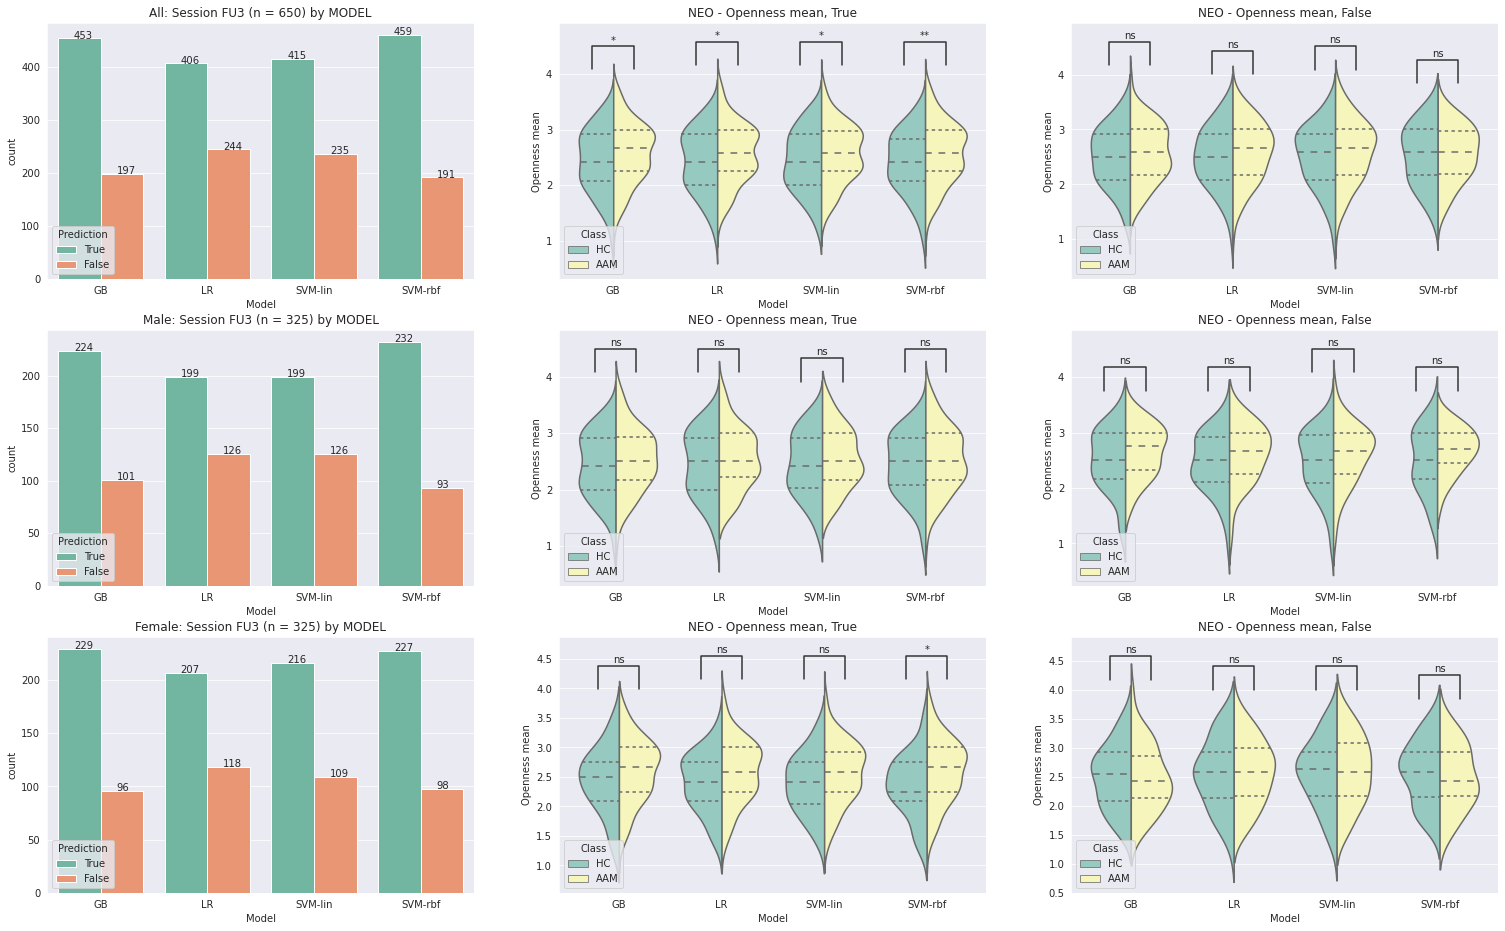

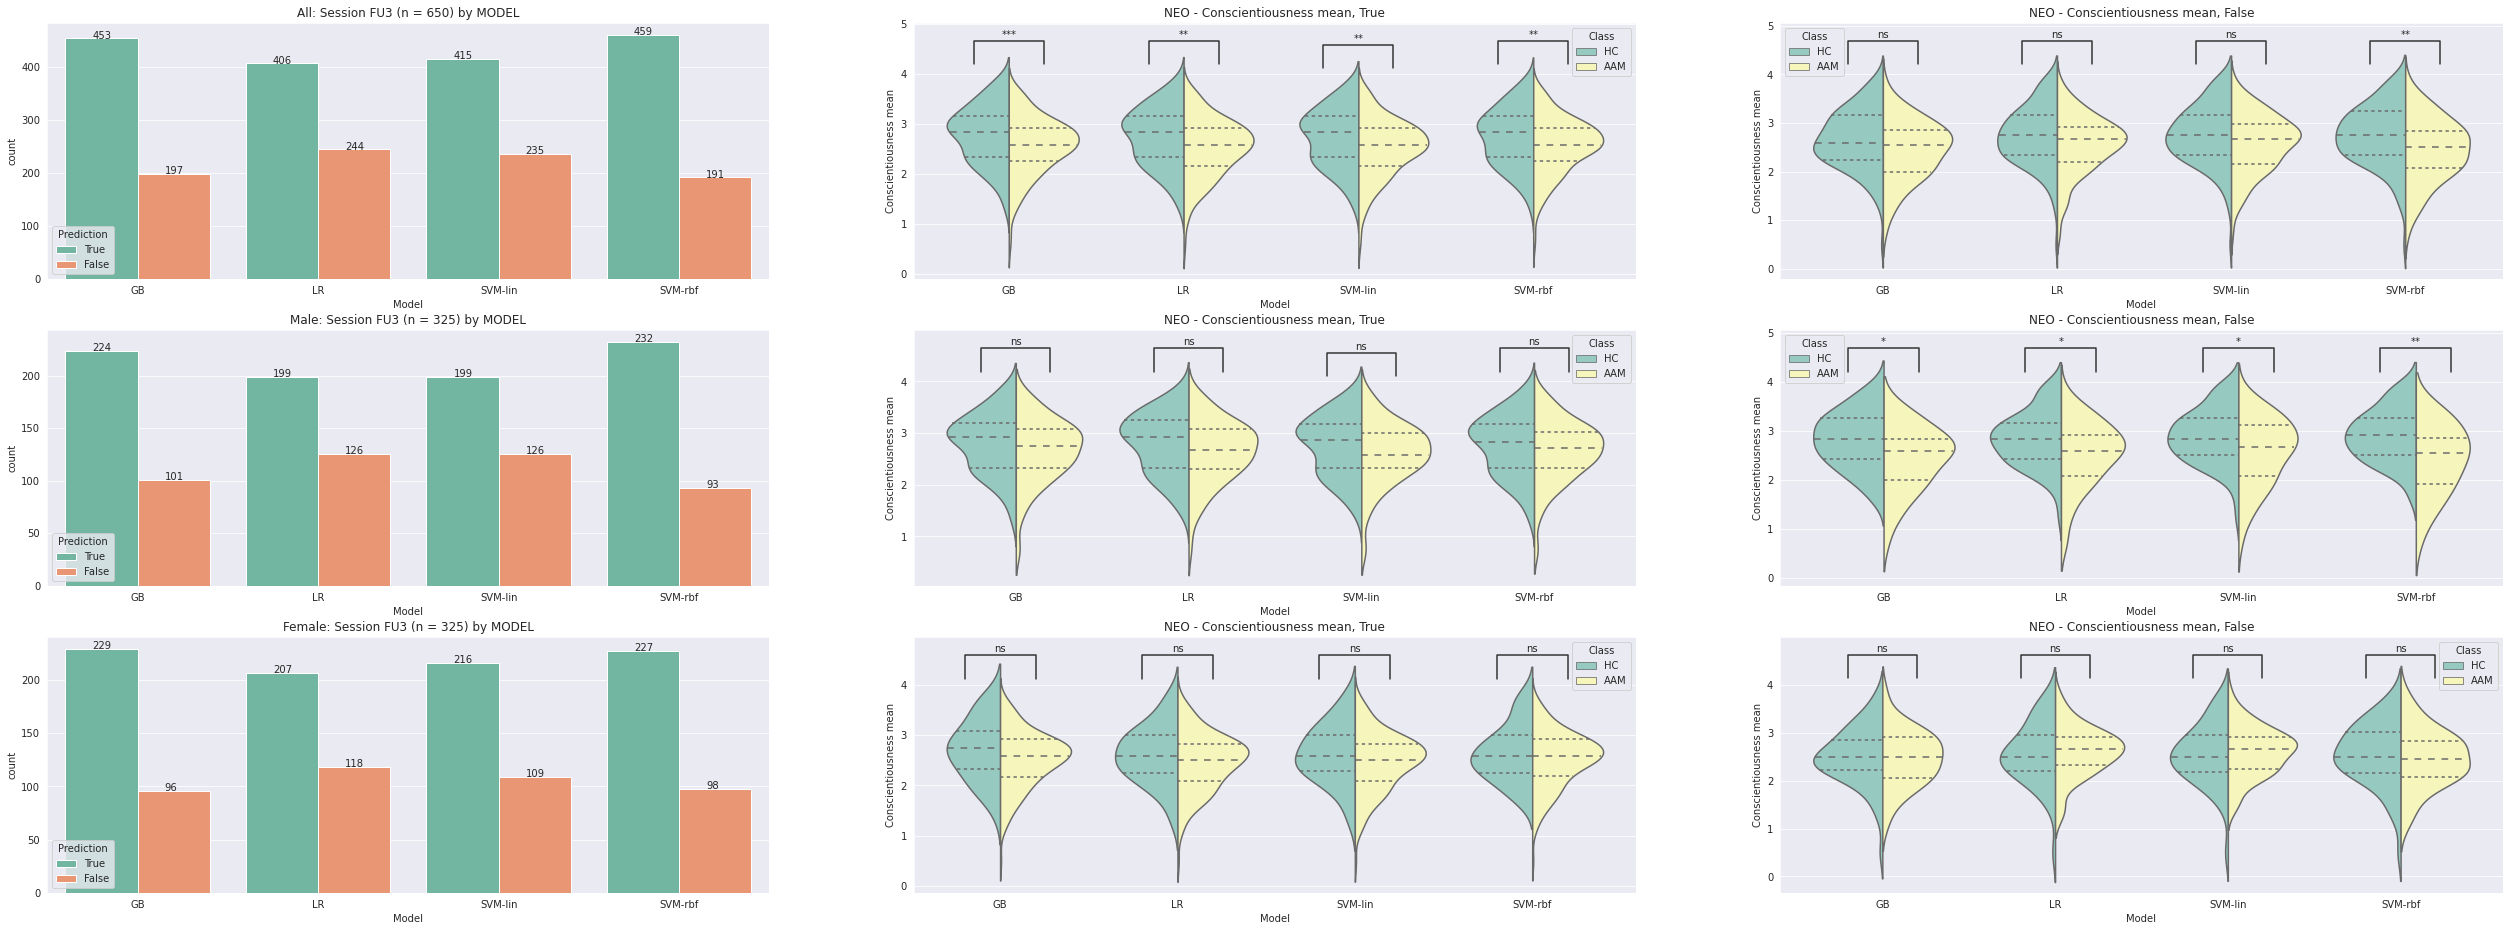

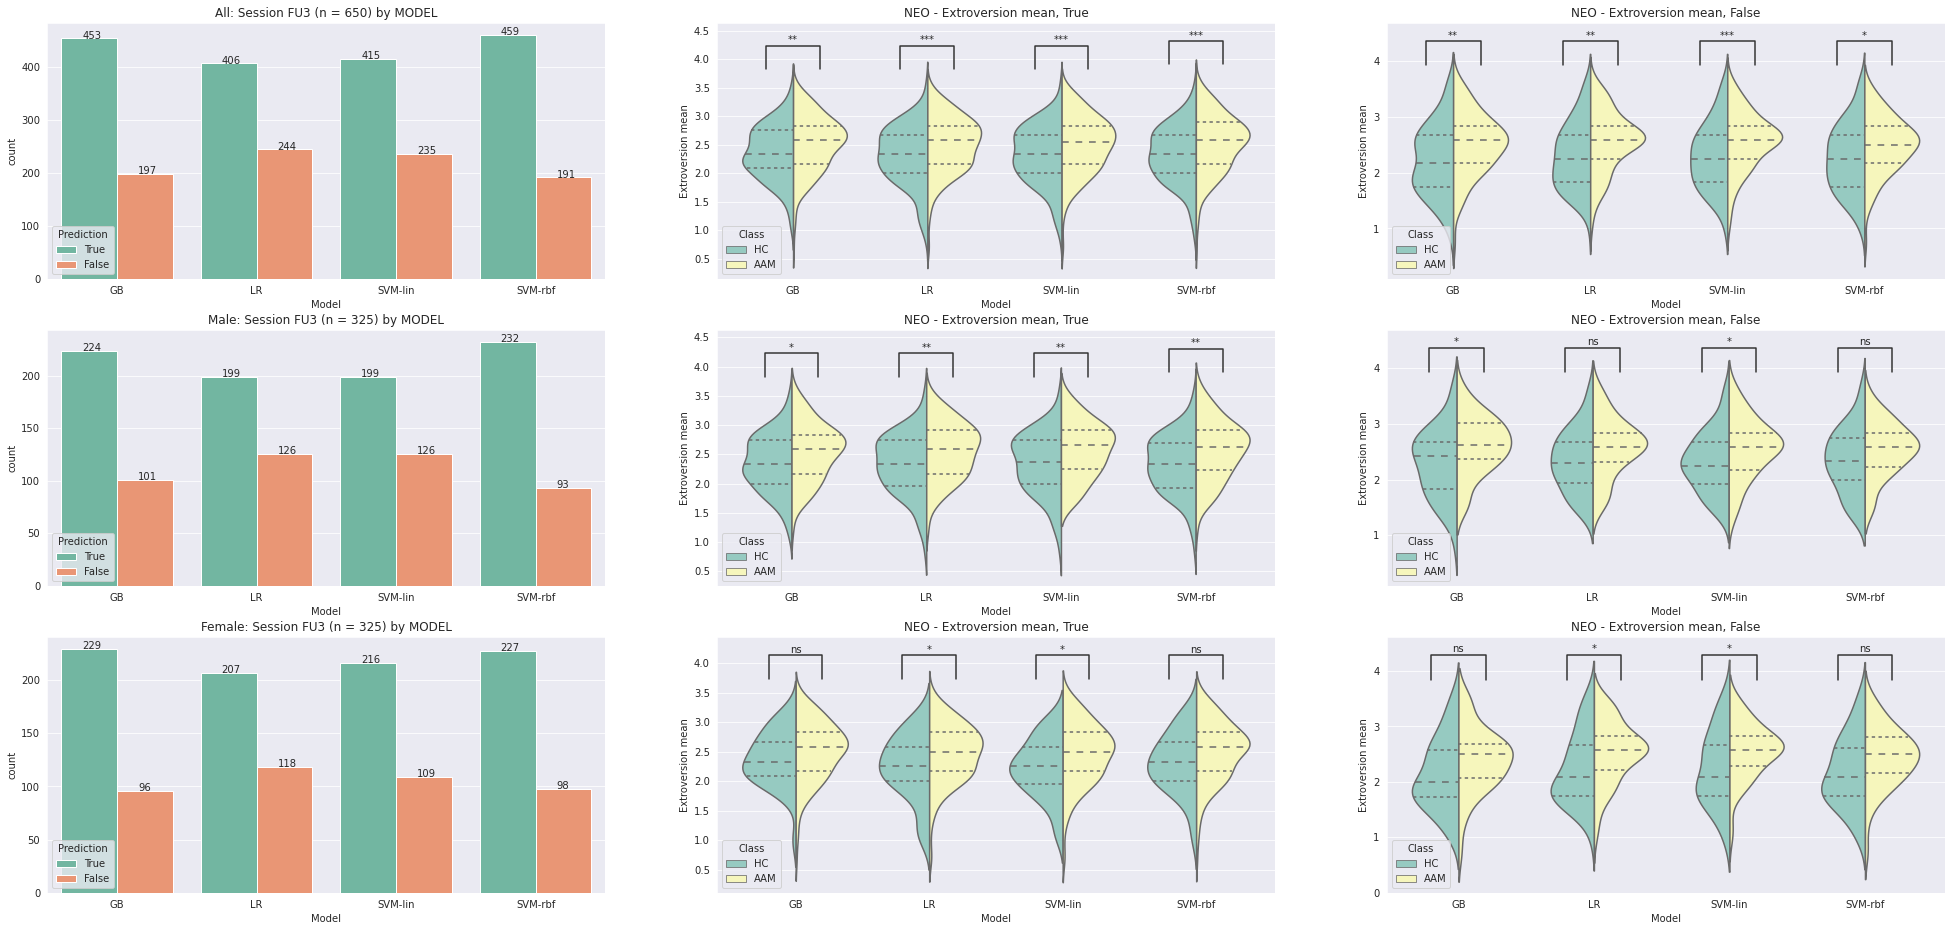

In [21]:
# Plot the result by Model prediction
ses_data = ph_NEO
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
data = b_FU3
# Openness
col = c_NEO[0]
NEO_ML_result = ml_plot('NEO', data, col)
# Conscietineuous
col = c_NEO[1]
NEO_ML_result = ml_plot('NEO', data, col)
# Extroversion
col = c_NEO[2]
NEO_ML_result = ml_plot('NEO', data, col)
# # Agreebleness
# col = c_NEO[3]
# NEO_ML_result = ml_plot('NEO', data, col)
# # Neuroticism
# col = c_NEO[4]
# NEO_ML_result = ml_plot('NEO', data, col)

### 3.1.2. SURPS ###

#### Diagnosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> Select the session (FU3)) </b>

<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=3.687e-01 stat=-1.688e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=3.070e-01 stat=-1.774e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=4.747e-02 stat=-2.527e+00
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=3.835e-01 stat=-1.669e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. (

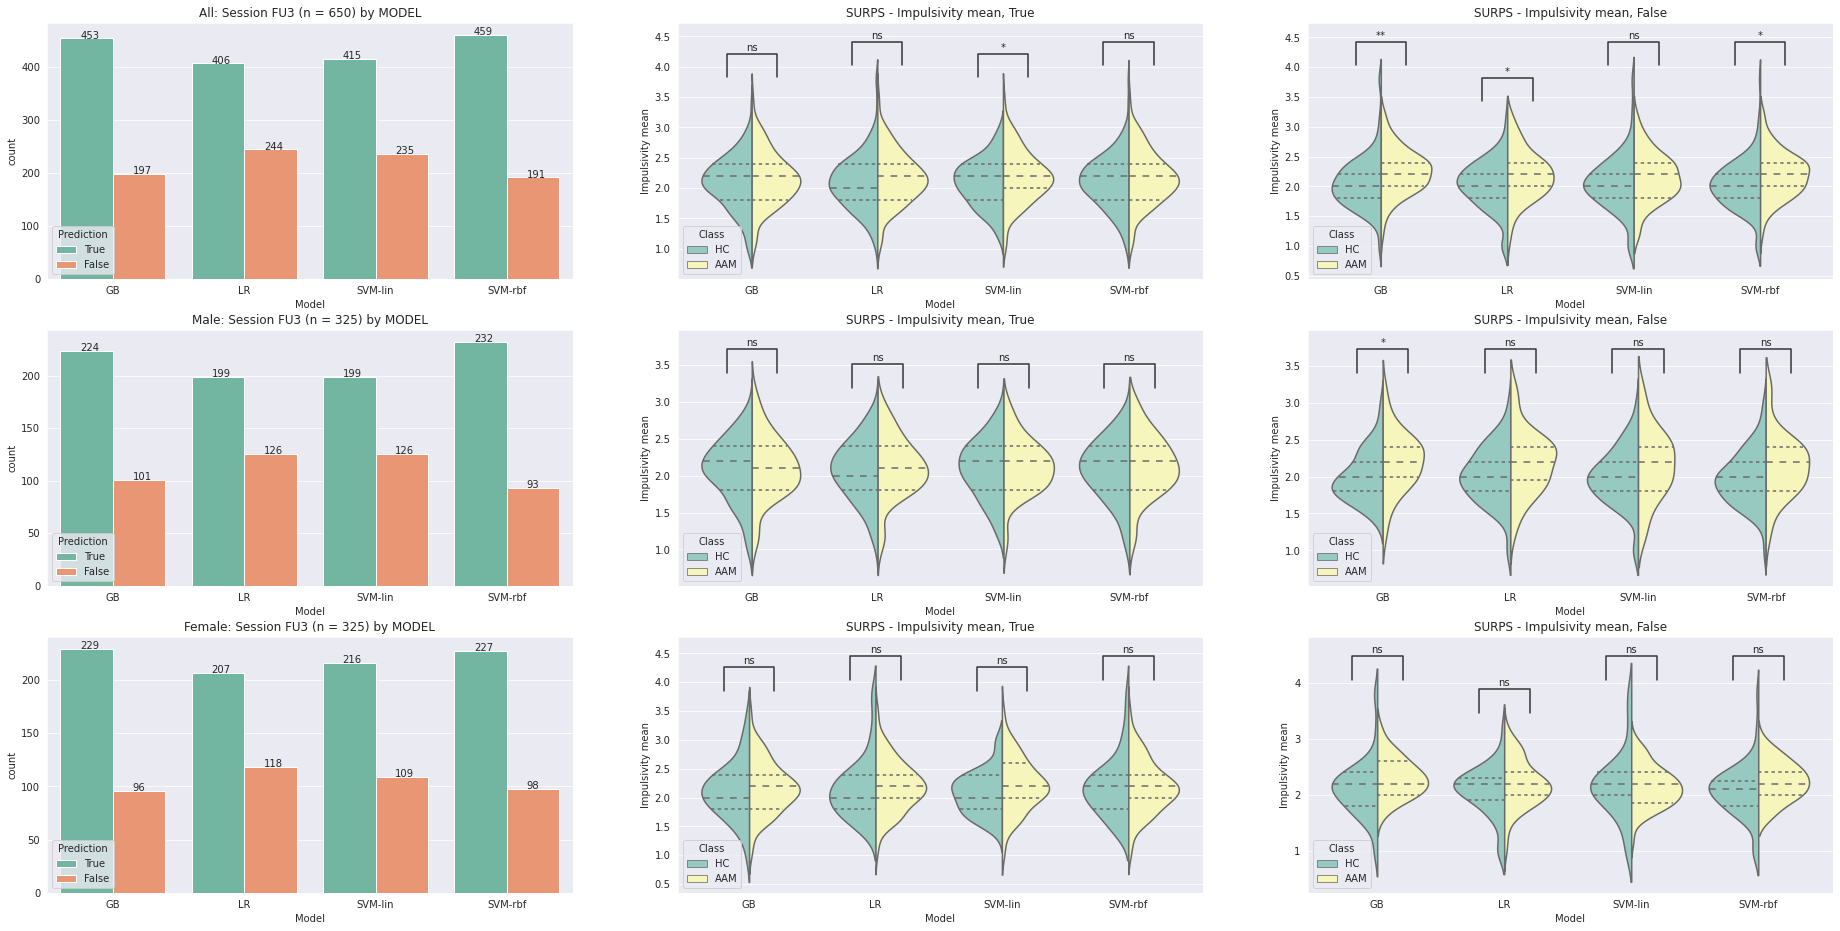

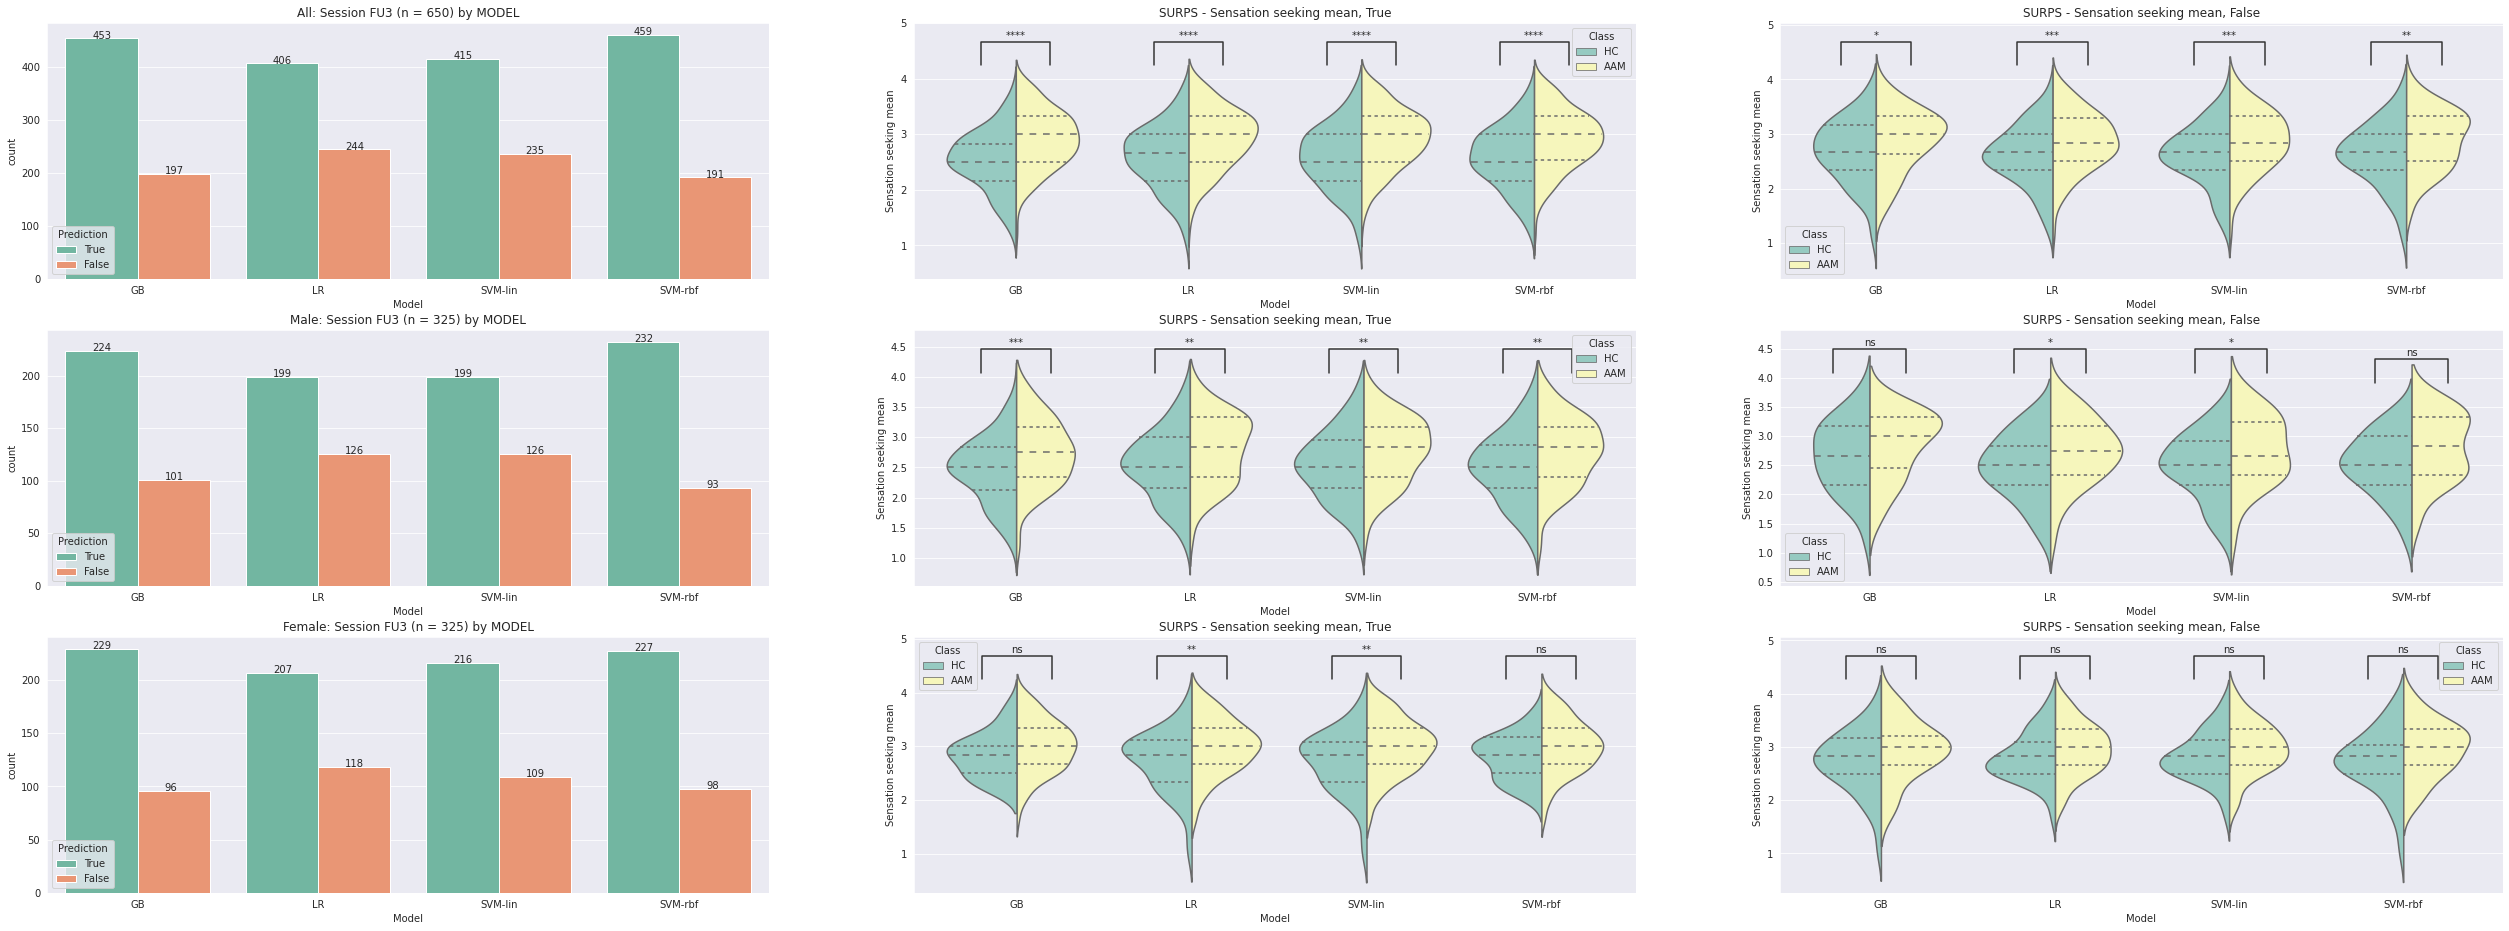

In [22]:
# Plot the result by Model prediction
ses_data = ph_SURPS
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
data = b_FU3

# # Hopelessness
# col = c_SURPS[0]
# SURPS_ML_result = ml_plot('SURPS', data, col)
# # Anxiety sensitivity
# col = c_SURPS[1]
# SURPS_ML_result = ml_plot('SURPS', data, col)
# Impulsivity
col = c_SURPS[2]
SURPS_ML_result = ml_plot('SURPS', data, col)
# Sensation seeking
col = c_SURPS[3]
SURPS_ML_result = ml_plot('SURPS', data, col)

## 3.2. Socio-economic profile

### 3.2.1. CTQ_SF

#### Diagnosis: Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
Please refer to <i>posthoc-preprocessing.ipynb</i> and <i>imagen_instrumentloader.py</i> for Instrument<br>
<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=3.269e-02 stat=2.661e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=2.007e-03 stat=3.510e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=1.074e-03 stat=3.683e+00
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=2.486e-04 stat=4.050e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X',

[Predict  Model                            Class
 False    ('X', 'Binge', 'cb', 'GB')       AAM      8.655172
                                           HC       7.760870
          ('X', 'Binge', 'cb', 'LR')       AAM      8.017241
                                           HC       8.277778
          ('X', 'Binge', 'cb', 'SVM-lin')  AAM      8.918367
                                           HC       8.425000
          ('X', 'Binge', 'cb', 'SVM-rbf')  AAM      8.676471
                                           HC       8.047619
 True     ('X', 'Binge', 'cb', 'GB')       AAM      7.847134
                                           HC       8.466667
          ('X', 'Binge', 'cb', 'LR')       AAM      7.953125
                                           HC       7.825000
          ('X', 'Binge', 'cb', 'SVM-lin')  AAM      7.635036
                                           HC       7.611111
          ('X', 'Binge', 'cb', 'SVM-rbf')  AAM      7.815789
                                    

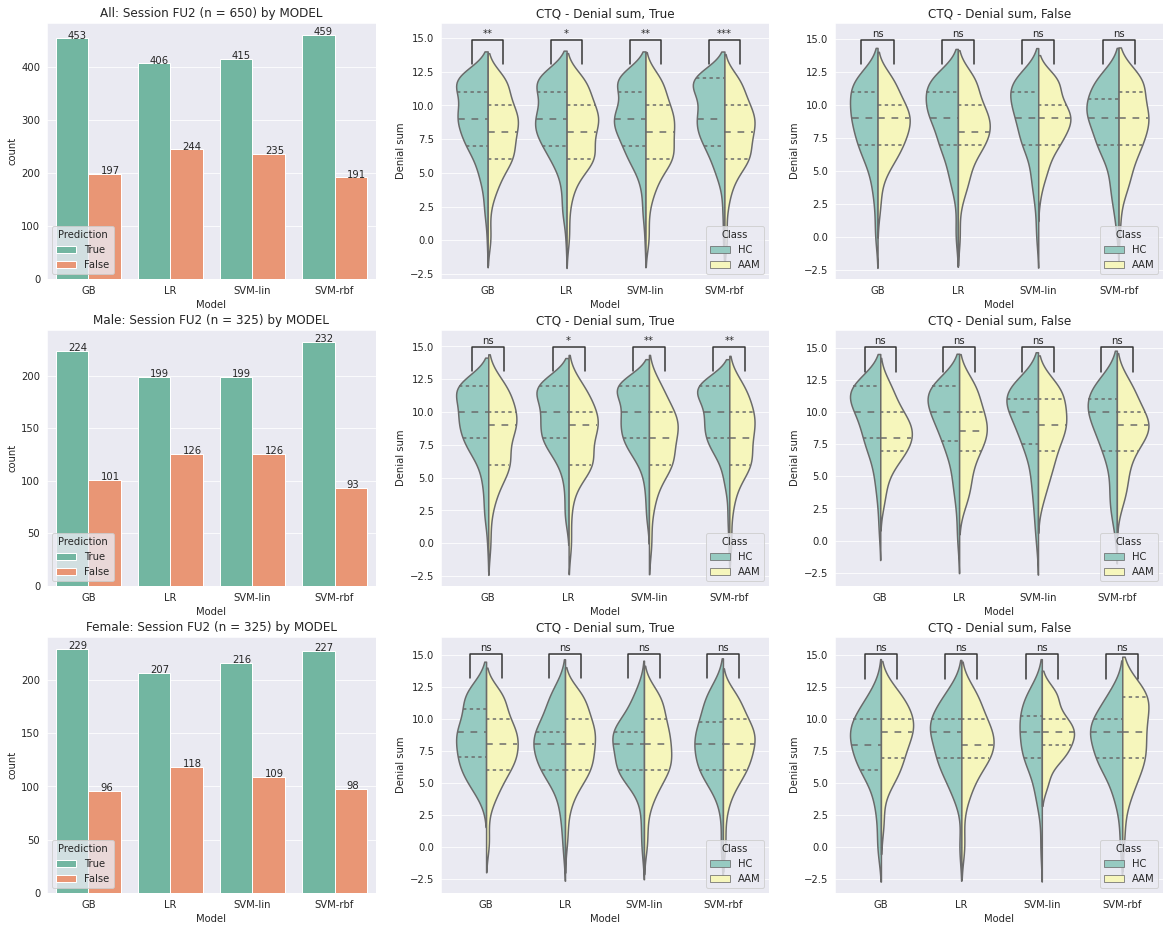

In [23]:
# Plot the result by Model prediction
data = ph_CTQ
col = ph_CTQ.columns[5]
CTQ_ML_result = ml_plot('CTQ', data, col)
CTQ_ML_result

### 3.2.2. LEQ

#### Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=3.329e-03 stat=3.367e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=1.775e-03 stat=3.539e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=1.663e-02 stat=2.882e+00
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=3.306e-03 stat=3.366e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X',

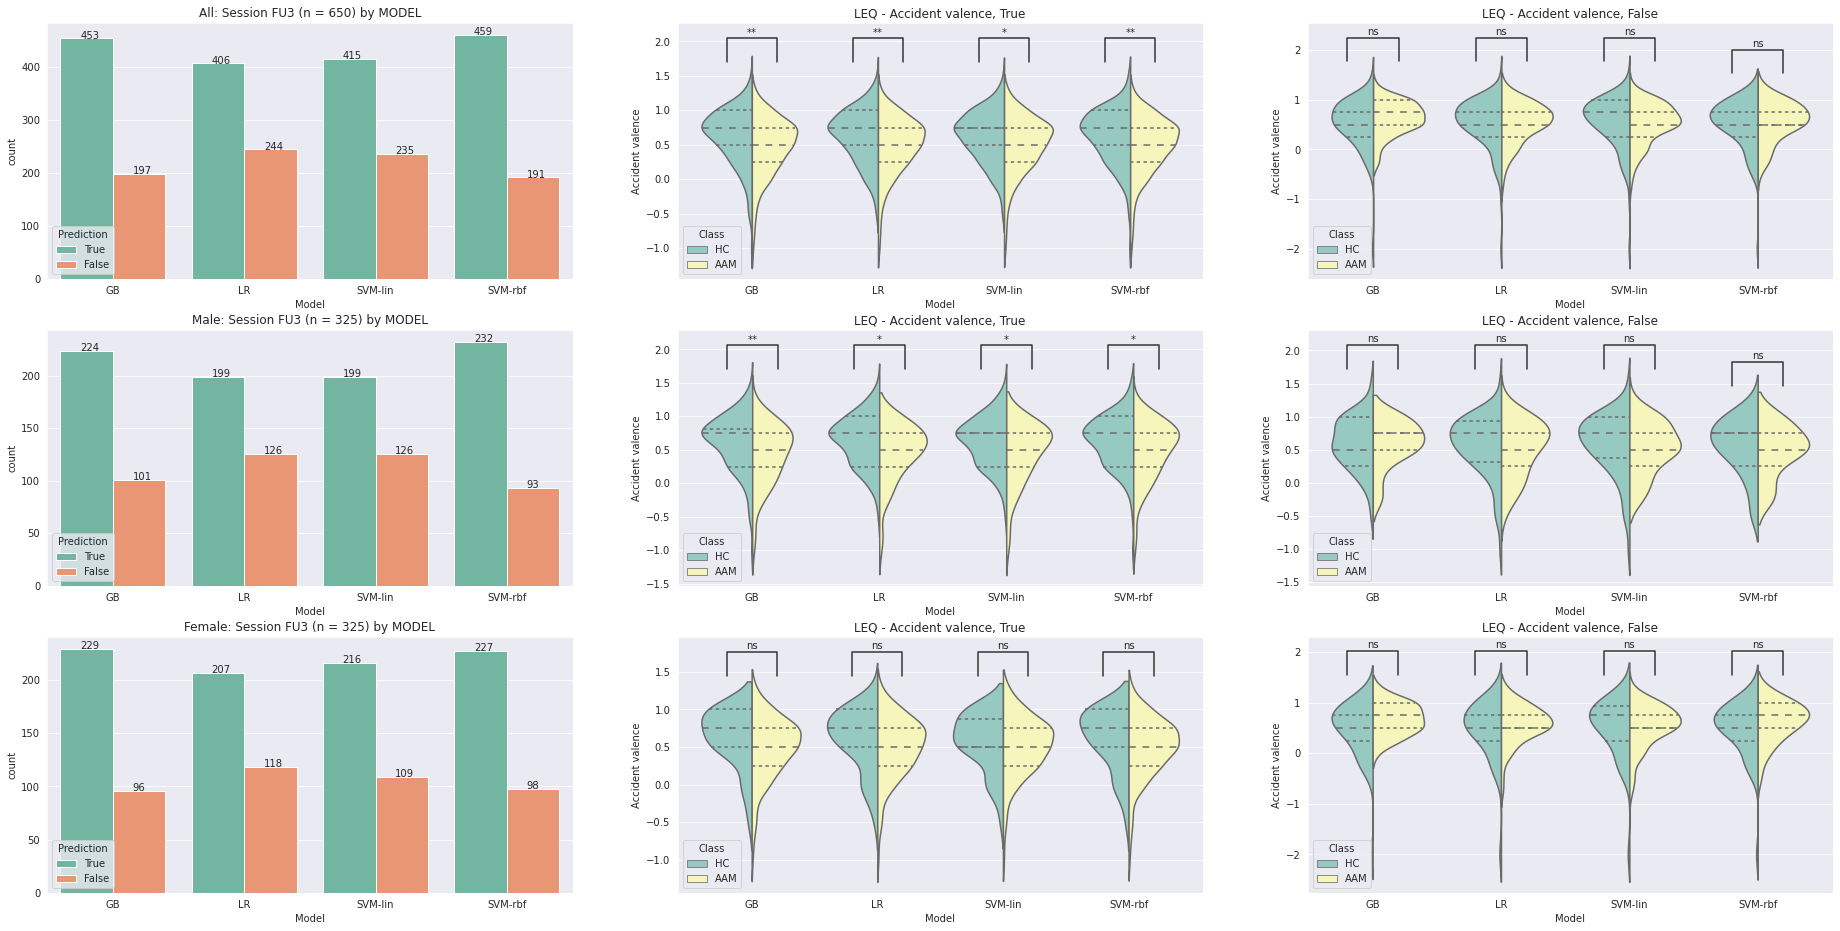

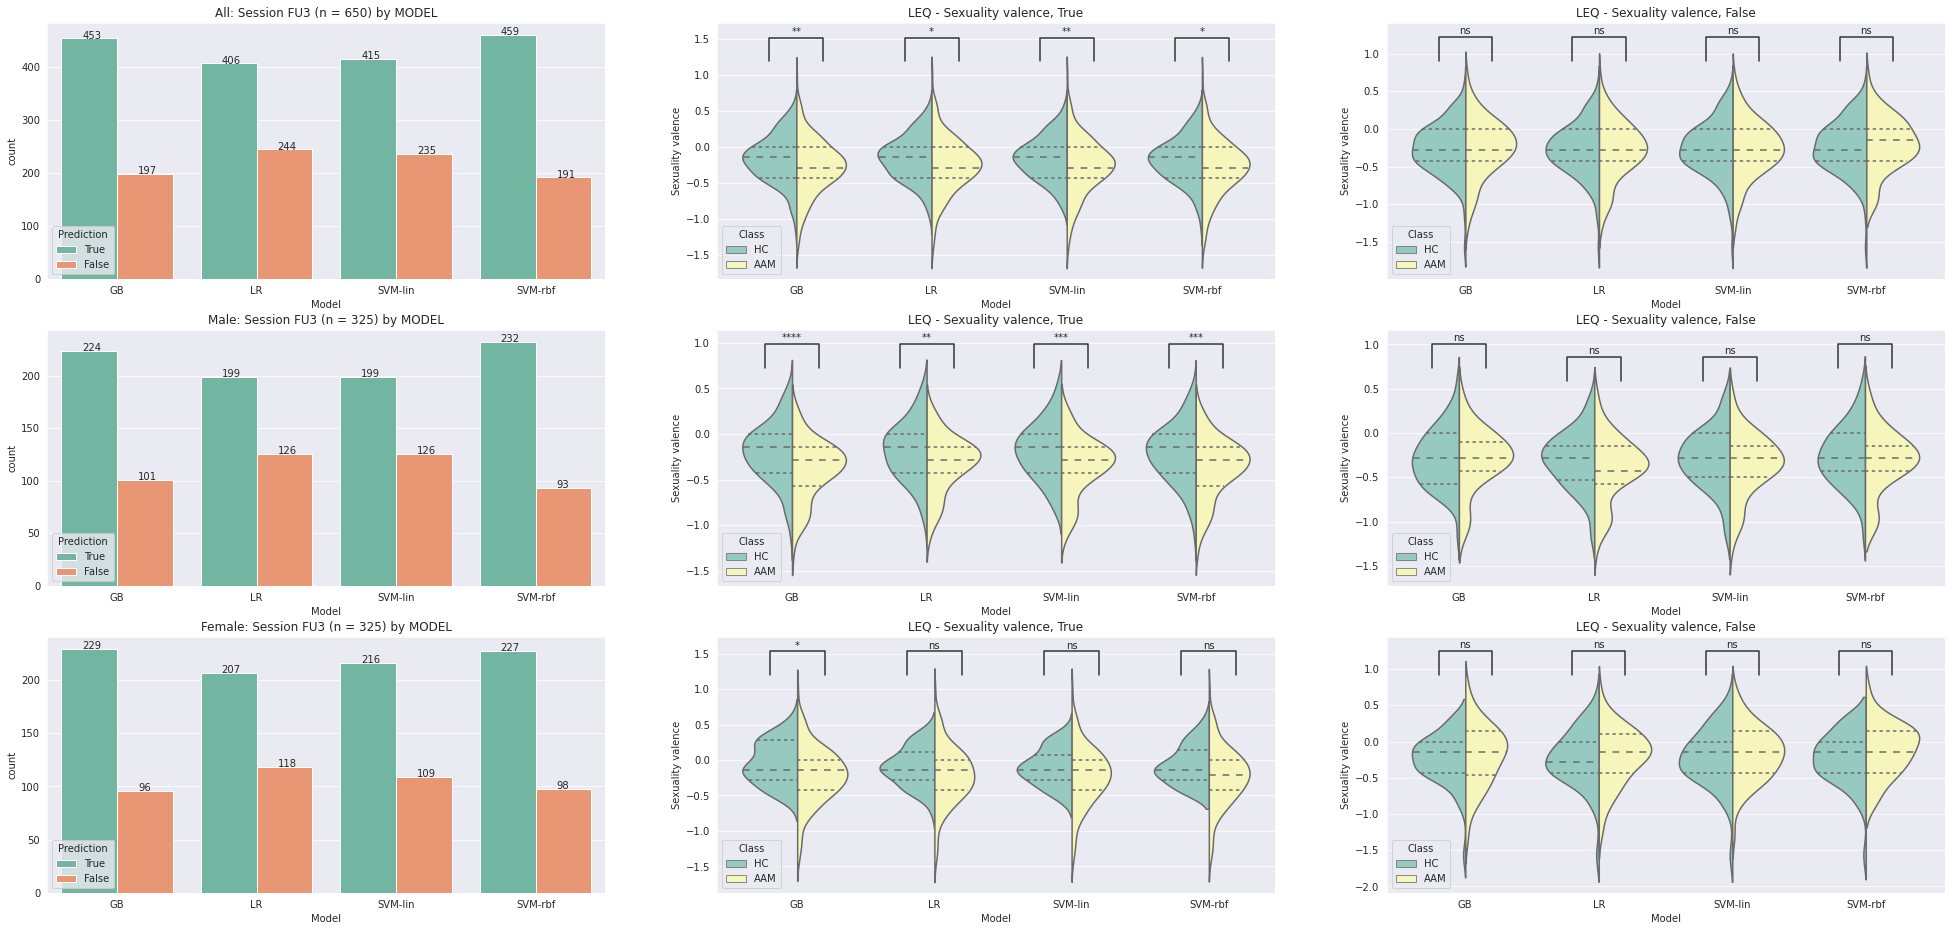

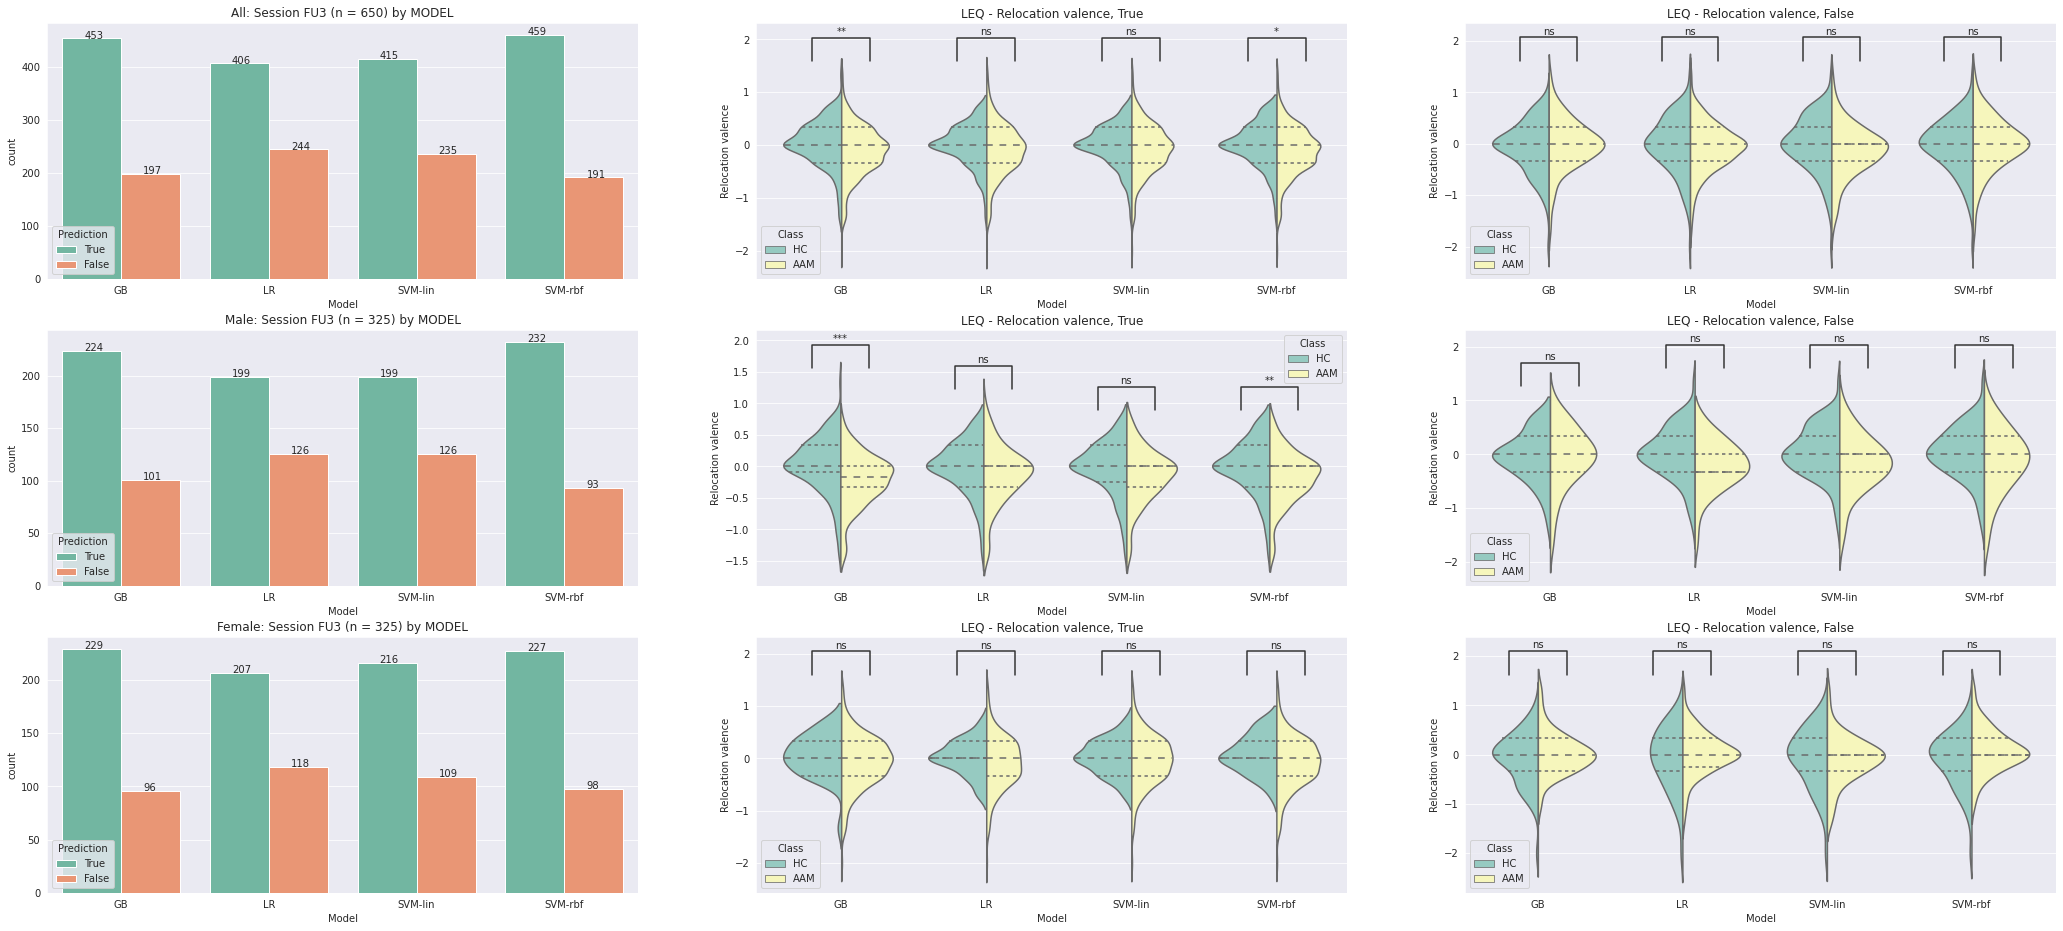

In [24]:
# Plot the result by Model prediction
ses_data = ph_LEQ
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
data = b_FU3

# Accident
col = ph_LEQ.columns[1]
LEQ_ML_result = ml_plot('LEQ', data, col)
# Sexuality
col = ph_LEQ.columns[2]
LEQ_ML_result = ml_plot('LEQ', data, col)
# Relocation
col = ph_LEQ.columns[5]
LEQ_ML_result = ml_plot('LEQ', data, col)

### 3.2.3. CTS
Conflict Tactics Scale (CTS)
#### Posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650
<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=4.564e-01 stat=-1.584e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=4.337e-01 stat=-1.609e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.609e-01
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.118e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. (

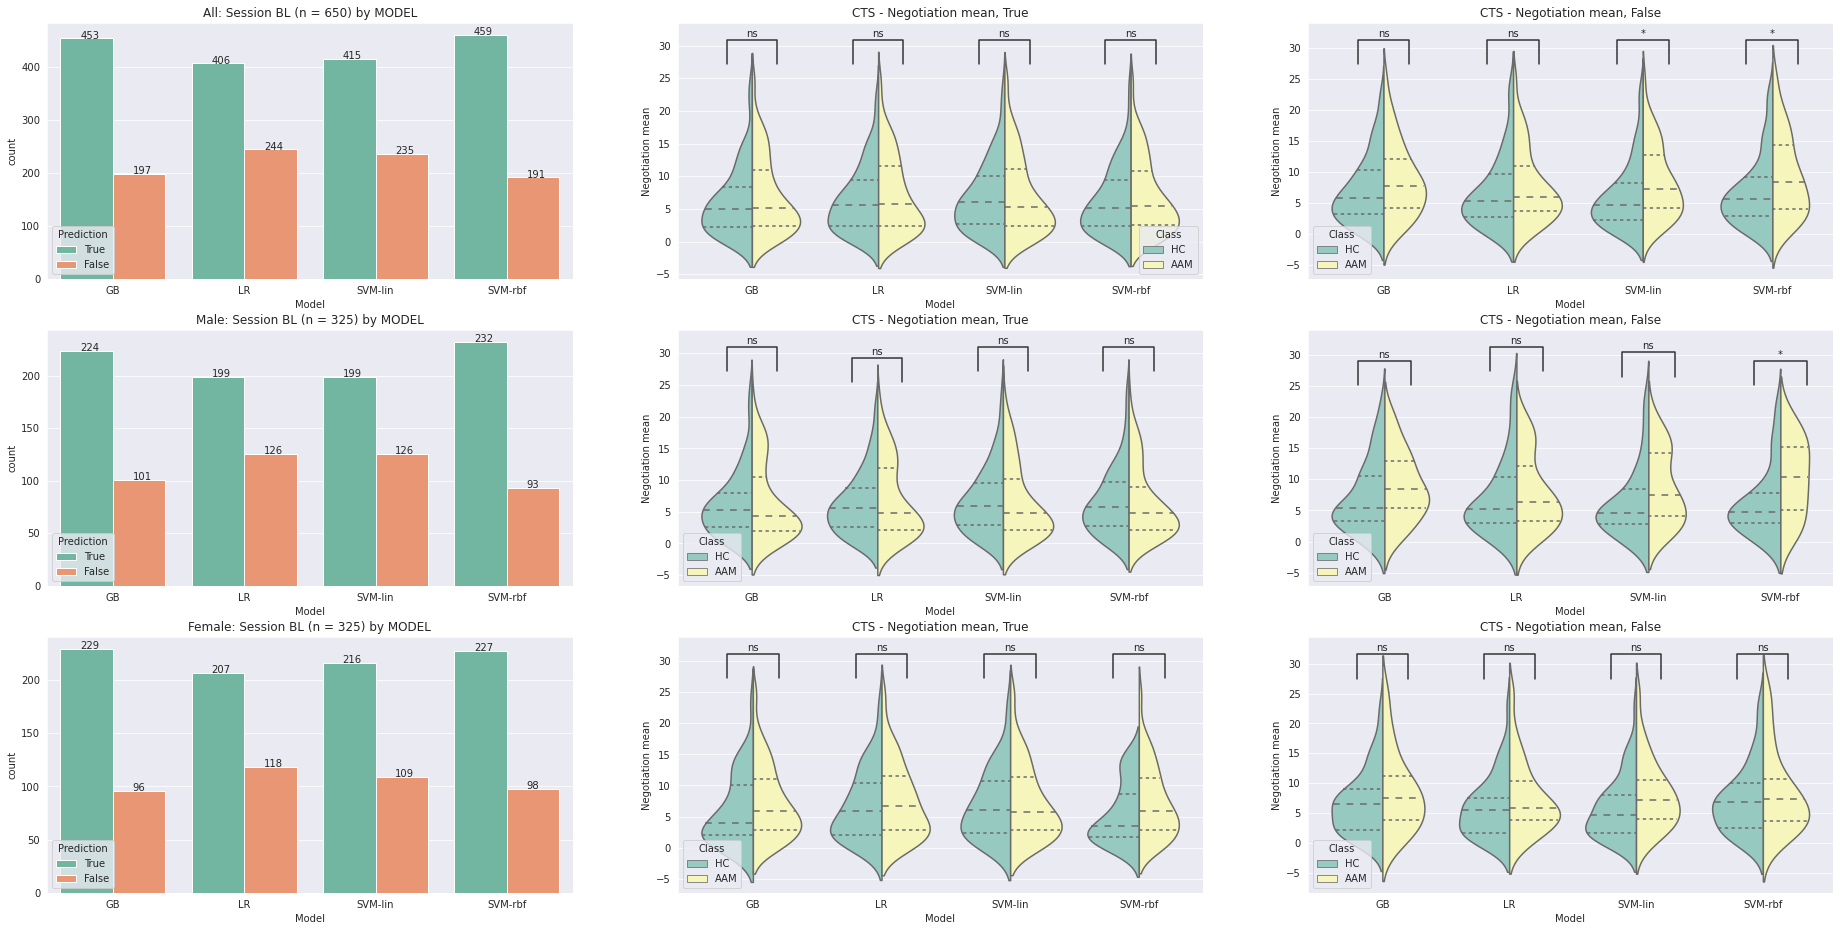

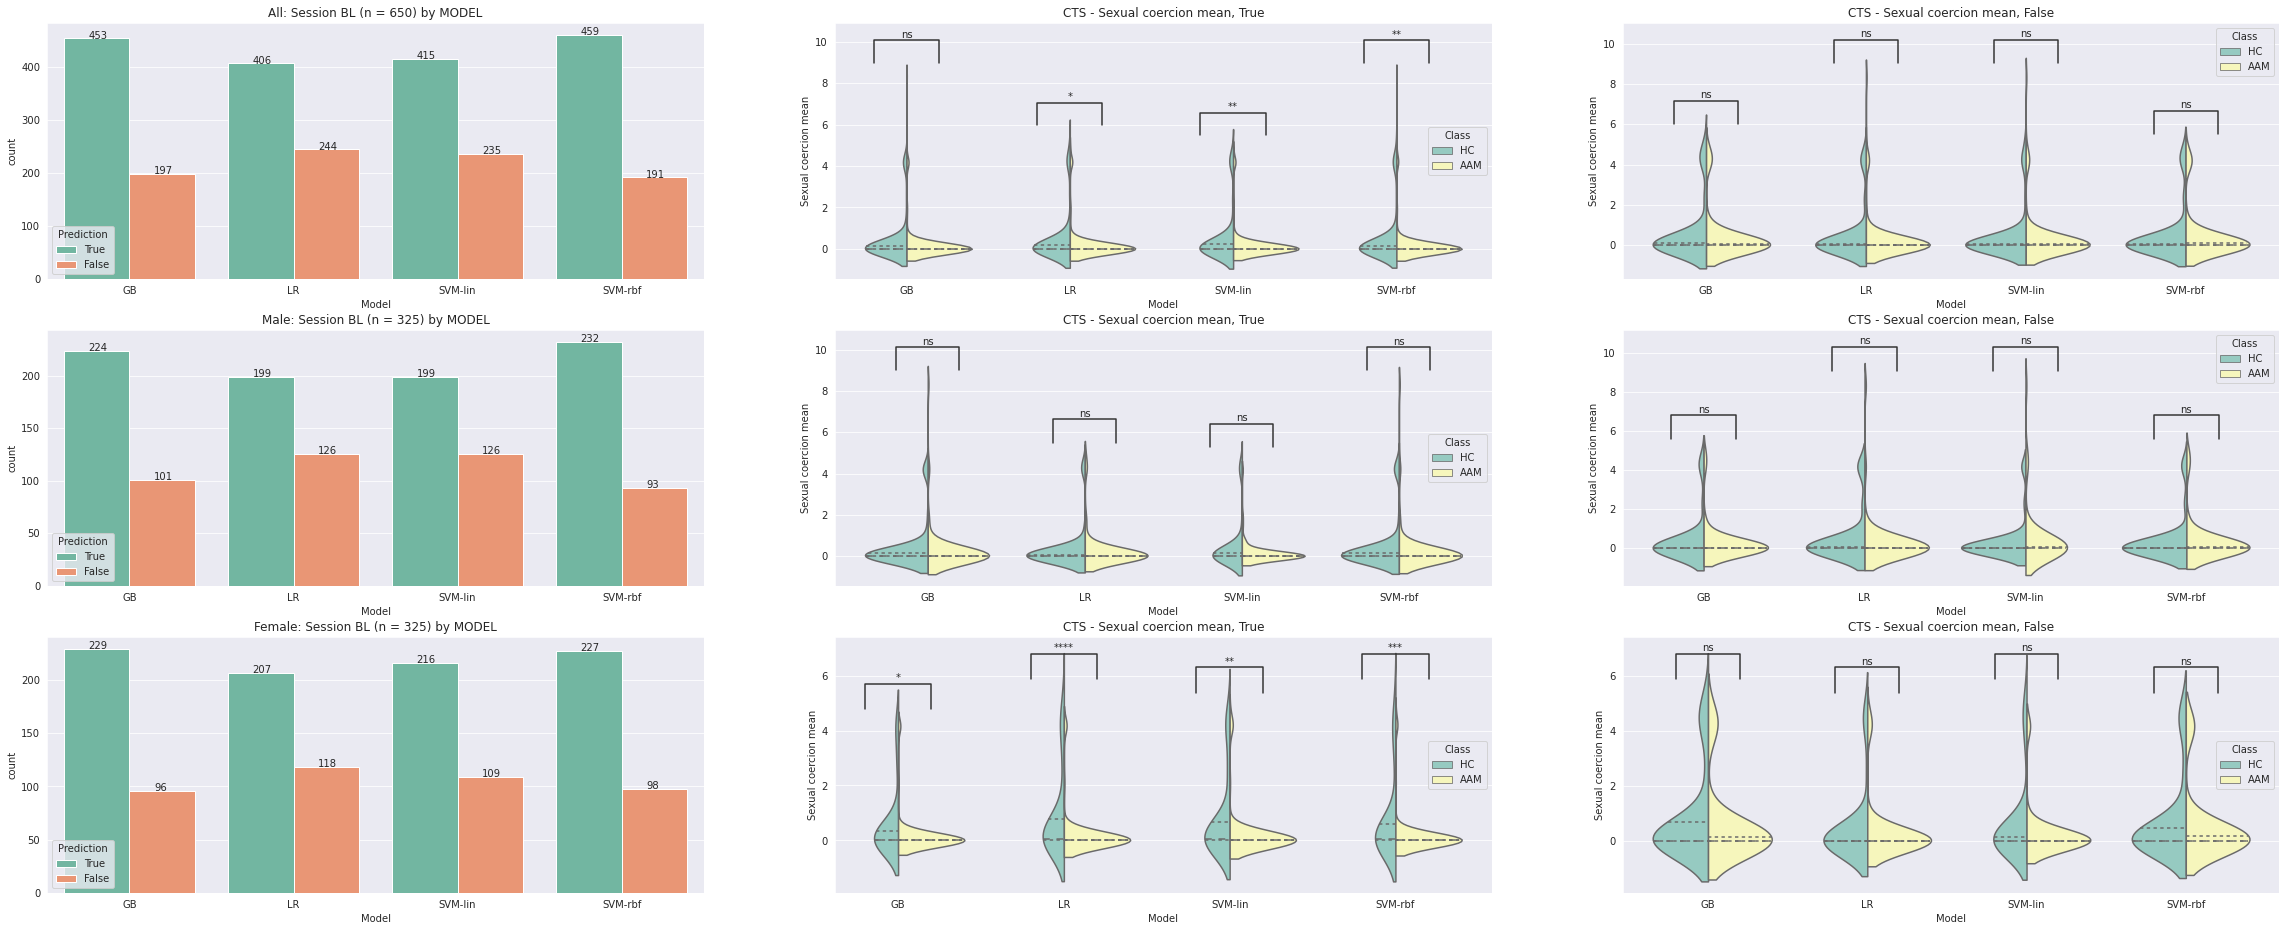

In [25]:
# Plot the result by Model prediction
data = ph_CTS
# Negotiation
col = ph_CTS.columns[2]
CTS_Ne_result = ml_plot('CTS', data, col)
# Sexual coersion
col = ph_CTS.columns[4]
CTS_Se_result = ml_plot('CTS', data, col)
# CTS_ML_result = ml_plot('CTS', data[data[col]<0.5], col)

In [26]:
CTS_Se_result[0]

Predict  Model                            Class
False    ('X', 'Binge', 'cb', 'GB')       AAM      0.631031
                                          HC       0.868056
         ('X', 'Binge', 'cb', 'LR')       AAM      0.333044
                                          HC       0.519841
         ('X', 'Binge', 'cb', 'SVM-lin')  AAM      0.262359
                                          HC       0.675463
         ('X', 'Binge', 'cb', 'SVM-rbf')  AAM      0.541667
                                          HC       0.719771
True     ('X', 'Binge', 'cb', 'GB')       AAM      0.168107
                                          HC       0.612847
         ('X', 'Binge', 'cb', 'LR')       AAM      0.205222
                                          HC       0.981337
         ('X', 'Binge', 'cb', 'SVM-lin')  AAM      0.240145
                                          HC       0.856481
         ('X', 'Binge', 'cb', 'SVM-rbf')  AAM      0.174451
                                          HC       0

# 4. Visualization SHAP

## 4.1. SHAP values
 1. what is the best/fastest estimator for my 4 models?
 2. how to save and load SHAP values?
 3. What to visualize?

In [27]:
#################################################################################
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import pandas as pd 
import numpy as np
from glob import glob
from os.path import join 
import os 
from scikits.bootstrap import ci
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from plotResults import *

In [29]:
#################################################################################
models_dir = sorted(glob("results/newlbls-fu3-espad-fu3-19a-binge-*/*/"))[-1]
models_dir

'results/newlbls-fu3-espad-fu3-19a-binge-n650/20210618-1730/'

In [30]:
import shap

In [31]:
# load all trained models
from joblib import load 

models = {}
model_names = list(set([f.split("_")[0] for f in os.listdir(models_dir) if f.split(".")[-1]=="model"]))
for model_name in model_names:
    models.update({model_name: [load(f) for f in glob(models_dir+f"/{model_name}_*.model")]})

models['LR'][0]

Pipeline(steps=[('varth', VarianceThreshold()), ('scale', StandardScaler()),
                ('conf_corr_cb',
                 CounterBalance(oversample=True, random_state=1)),
                ('model_LR', LogisticRegression(C=0.001, max_iter=1000))])

In [32]:
# load the training data
import h5py

h5_dir = "/ritter/share/data/IMAGEN/h5files/" + models_dir.split("/")[-3] + ".h5"
data = h5py.File(h5_dir, 'r')
data.keys(), data.attrs.keys()

(<KeysViewHDF5 ['Binge', 'X', 'i', 'sex', 'site']>,
 <KeysViewHDF5 ['X_col_names', 'confs', 'labels']>)

In [33]:
X = data['X'][()]
y = data[data.attrs['labels'][0]][()]
X_col_names = data.attrs['X_col_names'][()]

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

X.shape, y.shape, len(X_col_names)

((650, 723), (650,), 723)

In [34]:
# load the holdout data


In [ ]:
shap_values_stored = {}

for model_name in models:
    print("generating SHAP plots for model = {} ..".format(model_name))
    if "GB" not in model_name:
        print("skipping model {} as it takes too long".format(model_name))
        continue
    for i, model in enumerate(models[model_name]):
        print(model)
        explainer = shap.Explainer(model.predict, X100, output_names=["Healthy","AUD-risk"])
        shap_values = explainer(X)
        shap_values_stored.update({model_name+str(i): shap_values})
#         if ('model_LR' in model.steps):
#             # plot the coefs of Logistic Regression
#             coefs = {}
#             for i in range(model['model_LR'].coef_.shape[-1]):
#                 coefs.update({X_col_names[i] : model['model_LR'].coef_[0,i].round(4)})
#             pd.Series(coefs).sort_values(key=np.abs)[-15:].plot.barh(title="Model coefficients:")
#             plt.show()

generating SHAP plots for model = GB ..
Pipeline(steps=[('varth', VarianceThreshold()), ('scale', StandardScaler()),
                ('conf_corr_cb',
                 CounterBalance(oversample=True, random_state=27)),
                ('model_GB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=48, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                             

Permutation explainer:  51%|█████     | 332/650 [2:26:54<2:22:19, 26.85s/it]

In [ ]:
for k in shap_values_stored:
    shap_values = shap_values_stored[k]
    plt.title(k)
    shap.summary_plot(shap_values, features=X, feature_names=X_col_names, plot_type="bar")
    plt.show()
    shap.summary_plot(shap_values, features=X, feature_names=X_col_names, plot_type="dot")
    plt.show() #plt.savefig("viz/{}_{}_dot.pdf".format(model_name,str(i)))
    shap.group_difference_plot(shap_values.values, group_mask=data['sex'][()].astype(bool), 
                       feature_names=X_col_names, max_display=10)
    plt.show() #plt.savefig("viz/{}_{}_sexdiff.pdf".format(model_name,str(i)))

In [ ]:
model = models['GB'][0]

In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100, output_names=["Healthy","AUD-risk"])

In [ ]:
shap_values = explainer(X)

In [ ]:
# for i, sub in enumerate(shap_values): #.values.shape
#     print("sub idx={}".format(i))
#     for j, feature in enumerate(sub):
#         print("feature idx={}".format(j))
#         display(type(feature), feature)
        

# shap_values[...,0]

In [ ]:
# clustering = shap.utils.hclust(X, y)

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X_col_names, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X_col_names, plot_type="dot")

In [ ]:
shap.group_difference_plot(shap_values.values, group_mask=data['sex'][()].astype(bool), 
                           feature_names=X_col_names, max_display=10)

In [ ]:
# individual features
# shap.embedding_plot(396, shap_values.values, feature_names=X_col_names)
# shap.dependence_plot(ind, shap_values=None, features=None, feature_names=None, display_features=None)
# individual subject predictions
#  shap.waterfall_plot(shap_values, max_display=10, show=True)

In [ ]:
model = models['LR'][0]
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100, output_names=["Healthy","AUD-risk"], feature_names=X_col_names)

In [ ]:
shap_values_lr = explainer(X)

In [ ]:
# plot the coefs of Logistic Regression
coefs = {}

for i in range(model['model_LR'].coef_.shape[-1]):
    coefs.update({X_col_names[i] : model['model_LR'].coef_[0,i].round(4)})
pd.Series(coefs).sort_values(key=np.abs)[-15:].plot.barh(title="Model coefficients:")
plt.show()

In [ ]:
shap.summary_plot(shap_values_lr, features=X, feature_names=X_col_names, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values_lr, features=X, feature_names=X_col_names, plot_type="dot")

In [ ]:
shap.group_difference_plot(shap_values_lr.values, group_mask=data['sex'][()].astype(bool), 
                           feature_names=X_col_names, max_display=10)

In [ ]:
model = models['SVM-rbf'][0]
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100, output_names=["Healthy","AUD-risk"], feature_names=X_col_names)

In [ ]:
shap_values_svmrbf = explainer(X)

In [ ]:
shap.summary_plot(shap_values_svmrbf, features=X, feature_names=X_col_names, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values_svmrbf, features=X, feature_names=X_col_names, plot_type="dot")

In [ ]:
shap.group_difference_plot(shap_values_svmrbf.values, group_mask=data['sex'][()].astype(bool), 
                           feature_names=X_col_names, max_display=10)

In [ ]:
model = models['SVM-lin'][0]
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100, output_names=["Healthy","AUD-risk"], feature_names=X_col_names)
shap_values_svmlin = explainer(X)

In [ ]:
shap.summary_plot(shap_values_svmlin, features=X, feature_names=X_col_names, plot_type="bar")
shap.summary_plot(shap_values_svmlin, features=X, feature_names=X_col_names, plot_type="dot")
shap.group_difference_plot(shap_values_svmlin.values, group_mask=data['sex'][()].astype(bool), 
                           feature_names=X_col_names, max_display=10)